# Risk Analytics Case Study - EDA
No Machine Learning

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Loading Libraries

In [1]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
##import the useful libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data and Observing Datasets

In [3]:
# Read application_data dataset and check the first five rows 
# Contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

ad = pd.read_csv('../input/credit-eda-case-study/application_data.csv')
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Read previous_application dataset and check the first five rows
# Contains information about the client’s previous loan data. 
# Contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

pa = pd.read_csv('../input/credit-eda-case-study/previous_application.csv')
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## **Inspect the Dataframe**
Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.



### Observing Data Set and Cleaning of application_data Dataset

In [5]:
# Check the number of rows and columns in application

print("Numbers of rows in application data set are:", len(ad))
print("Numbers of column in application data set are:", len(ad.columns))

Numbers of rows in application data set are: 307511
Numbers of column in application data set are: 122


In [6]:
# Widen output display to see more columns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
# Check the column-wise info of the application_data dataframe

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In Application dataframe we have 65 float attributes, 41 integer attributes and 16 Object attributes.

In [8]:
#percentage of missing values in application_data

ad.isnull().sum()* 100 / len(pa)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000718
AMT_GOODS_PRICE                  0.016645
NAME_TYPE_SUITE                  0.077355
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     12.149880
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#drop columns with very high Null values and other irrelevant columns in application_data

ad.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
        'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 
        'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OWN_CAR_AGE',
        'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
        'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG','FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG','LIVINGAPARTMENTS_AVG', 
        'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
        'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE','LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
        'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI','BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
        'YEARS_BUILD_MEDI','COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI','FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
        'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE','WALLSMATERIAL_MODE',
        'EMERGENCYSTATE_MODE'
        ], axis =1, inplace=True)

In [10]:
#Checking numbers of rows after dropping very high Null values and other irrelevant columns in application_data

len(ad.columns)

51

In [11]:
# Check info of application data after dropping irrelevant columns

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
# Drop rows from columns with very negligible Null values in application

ad.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_GOODS_PRICE','NAME_TYPE_SUITE'], inplace=True)

In [13]:
# Impute negligible Null values of AMT_INCOME_TOTAL with mean

ad.AMT_INCOME_TOTAL.fillna(ad.AMT_INCOME_TOTAL.mean(), inplace = True)
ad.AMT_INCOME_TOTAL.isnull().sum()

0

In [14]:
# Impute OCCUPATION_TYPE

ad.OCCUPATION_TYPE.value_counts()

Laborers                 54970
Sales staff              31957
Core staff               27426
Managers                 21275
Drivers                  18520
High skill tech staff    11326
Accountants               9768
Medicine staff            8504
Security staff            6694
Cooking staff             5929
Cleaning staff            4641
Private service staff     2637
Low-skill Laborers        2085
Waiters/barmen staff      1340
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
# Check gender values

print("Data before rectifying undefined value: \n\n",ad.CODE_GENDER.value_counts())

# Replace negligible undefined values in gender with mode(highest value)

ad.CODE_GENDER.replace(to_replace='XNA', value='F', inplace=True)
ad.CODE_GENDER.value_counts()

Data before rectifying undefined value: 

 F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64


F    201639
M    104568
Name: CODE_GENDER, dtype: int64

In [16]:
# Convert client age from days to years

ad.DAYS_BIRTH = round(abs(ad.DAYS_BIRTH/364))  #abs function used because Days_Birth is in negative
ad.DAYS_BIRTH.head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [17]:
# Final shape of application data after cleaning
ad.shape

(306207, 51)

### Observing Data Set and Cleaning of Previous Application Dataset

In [18]:
# Describe previous application data

print("Numbers of rows in previous application data set are:", len(pa))
print("Numbers of column in previous application data set are:", len(pa.columns))

Numbers of rows in previous application data set are: 1670214
Numbers of column in previous application data set are: 37


In [19]:
# Check the column-wise info of the previous application dataframe
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In Previous Application dataframe we have 15 float attributes, 6 integer attributes and 16 Object attributes.

In [20]:
# Check the summary for the numeric columns of previous application
Numeric_column_pa = pa.select_dtypes(include=np.number)


In [21]:
# Percentage of Null values in previous application
pa.isnull().sum()* 100 / len(pa)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [22]:
# Drop columns with very high Null values (more than 40% of null value)and other irrelevant columns in previous application
pa.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED', 'SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
         'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 
         'NAME_TYPE_SUITE'], axis =1, inplace=True)

In [23]:
# Checking numbers of columns after dropping very high Null values and other irrelevant columns in previous application
len(pa.columns)

23

In [24]:
# Drop rows from columns with very negligible Null values in previous application
pa.dropna(subset=['PRODUCT_COMBINATION','AMT_CREDIT'], inplace=True)
pa.PRODUCT_COMBINATION.isnull().sum()

0

In [25]:
# Describe AMT_ANNUITY of previous application
print(pa.AMT_ANNUITY.describe())

# Percentage of Null values in AMT_ANNUITY
print('\nPercentage of Null values in AMT_ANNUITY:',round(pa.AMT_ANNUITY.isnull().sum()* 100 / len(pa.AMT_ANNUITY),2))

count    1.297978e+06
mean     1.595513e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

Percentage of Null values in AMT_ANNUITY: 22.27


In [26]:
# Describe AMT_ANNUITY
pa.AMT_ANNUITY.describe()

count    1.297978e+06
mean     1.595513e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [27]:
# Check NAME_SELLER_INDUSTRY. More than half its values are undefined
pa.NAME_SELLER_INDUSTRY.value_counts(normalize=True)

XNA                     0.512446
Consumer electronics    0.238501
Connectivity            0.165095
Furniture               0.034643
Construction            0.017834
Clothing                0.014342
Industry                0.011494
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000728
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

# Checking outliers and perfoming univariate analysis 

### Identifying outliers in the Application_data dataframe and adding inferences of them. 

In [28]:
# Extracting the numeric features from application data

numeric_features_ad = []
for col in ad.columns:
    if ad[col].dtype == float or ad[col].dtype == int:
        numeric_features_ad.append(col)
        
print(numeric_features_ad)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


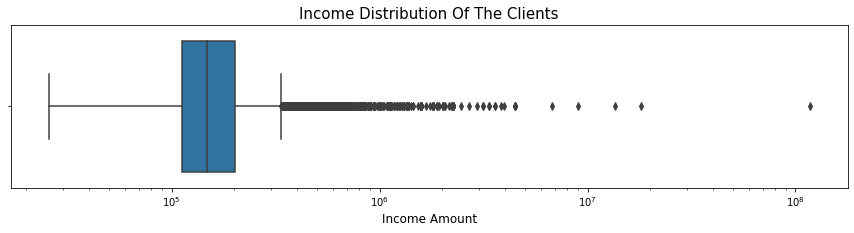

In [29]:
# check outliers in total income amount of application_data

plt.figure(figsize=[15,3])
sns.boxplot(ad.AMT_INCOME_TOTAL)
plt.title('Income Distribution Of The Clients', fontsize=15)
plt.xlabel('Income Amount', fontsize=12)
plt.xscale('log')
plt.show()

**Inference:**
* The income distribution of clients has some extreme outlier values beyond 99th percentile.

In [30]:
# Check quantiles of AMT_INCOME_TOTAL

ad.AMT_INCOME_TOTAL.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995])

0.500    147600.0
0.600    162000.0
0.700    180000.0
0.800    225000.0
0.900    270000.0
0.950    337500.0
0.990    472500.0
0.995    630000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [31]:
# Description of columns where AMT_INCOME_TOTAL is above 99th percentile

ad[ad.AMT_INCOME_TOTAL>472500].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,2988.000000,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.0,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2936.000000,2936.000000,2936.000000,2936.000000,2988.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,278083.443106,0.053882,0.503681,7.562140e+05,1.119002e+06,51211.012048,1.038869e+06,0.032638,43.223896,20299.269411,-4211.202142,-2922.491299,1.0,0.937416,0.168340,0.988286,0.328313,0.144578,2.270750,1.660643,1.634203,12.897256,0.044846,0.150268,0.128514,0.070950,0.192436,0.160643,0.994210,0.086853,0.982970,0.057902,-1004.450469,0.007066,0.011157,0.035701,0.462626,0.244329,1.627371
std,102654.543500,0.225823,0.790587,2.196132e+06,5.905254e+05,28773.909522,5.593150e+05,0.022988,9.618627,88914.673380,3306.235602,1553.941647,0.0,0.242253,0.374231,0.107611,0.469678,0.351734,0.962985,0.623148,0.608825,3.496301,0.207001,0.357393,0.334717,0.256785,0.394280,0.367262,1.990685,0.347712,1.977139,0.273881,887.633596,0.083777,0.178520,0.204645,1.460096,0.582634,1.787297
min,100059.000000,0.000000,0.000000,4.750470e+05,4.500000e+04,5598.000000,4.500000e+04,0.001276,21.000000,-15043.000000,-18386.000000,-6206.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190172.750000,0.000000,0.000000,5.400000e+05,6.750000e+05,33927.750000,6.750000e+05,0.011657,36.000000,-3367.500000,-6318.000000,-4290.250000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1616.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277040.000000,0.000000,0.000000,6.300000e+05,1.024740e+06,45954.000000,9.000000e+05,0.028663,43.000000,-1795.000000,-3593.500000,-3148.500000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-762.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,368660.000000,0.000000,1.000000,6.778125e+05,1.350000e+06,62385.750000,1.350000e+06,0.046220,50.000000,-794.000000,-1338.750000,-1611.750000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-270.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456236.000000,1.000000,5.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.000000,20.000000,4.000000,0.000000,1.000000,6.000000,4.000000,17.000000,5.000000,13.000000


In [32]:
# Description of columns where AMT_INCOME_TOTAL is above 0.995 percentile

ad[ad.AMT_INCOME_TOTAL>630000].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1437.000000,1437.000000,1437.000000,1.437000e+03,1.437000e+03,1437.000000,1.437000e+03,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.00000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1399.000000,1399.000000,1399.000000,1399.000000,1437.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,276268.617258,0.050800,0.506611,9.840125e+05,1.143183e+06,54576.191023,1.072682e+06,0.033031,43.285317,18623.899791,-4166.382046,-2904.157968,1.0,0.941545,0.190675,0.984690,0.323591,0.147530,2.269311,1.654141,1.635351,12.93737,0.041754,0.148225,0.129436,0.066110,0.191371,0.160056,0.989993,0.087205,0.977841,0.056469,-946.933194,0.007924,0.015848,0.027734,0.408082,0.240095,1.425515
std,102115.981580,0.219666,0.793948,3.151290e+06,6.137601e+05,34289.152667,5.883100e+05,0.023164,9.615484,85874.574342,3254.284999,1569.453493,0.0,0.234684,0.392970,0.122824,0.468009,0.354757,0.969154,0.614987,0.604604,3.45931,0.200095,0.355447,0.335799,0.248561,0.393517,0.366785,2.141266,0.354171,2.132639,0.276058,857.682513,0.088698,0.224727,0.178169,1.274665,0.570384,1.650343
min,100366.000000,0.000000,0.000000,6.316245e+05,1.125000e+05,6750.000000,1.080000e+05,0.001276,22.000000,-13804.000000,-18386.000000,-6079.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190205.000000,0.000000,0.000000,6.750000e+05,6.750000e+05,34510.500000,6.750000e+05,0.011657,36.000000,-3432.000000,-6218.000000,-4298.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1566.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273799.000000,0.000000,0.000000,7.200000e+05,1.056447e+06,48118.500000,9.000000e+05,0.028663,43.000000,-1883.000000,-3556.000000,-3108.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,13.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-684.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,364081.000000,0.000000,1.000000,9.000000e+05,1.389204e+06,66532.500000,1.350000e+06,0.046220,50.000000,-865.000000,-1355.000000,-1565.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,15.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,454864.000000,1.000000,5.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,65.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,3.000000,23.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.000000,20.000000,4.000000,0.000000,1.000000,6.000000,3.000000,17.000000,4.000000,9.000000


**Inference:** 
* Out of total 306207 applicants 0.99 applicants have more salary than the 99 percentile salary which is at 472500. 
* Only 0.46% applicants are earning more than 99.5 percentile which is at 630000.
* This value is far from our mean value 147600. Also, in the boxplot it is showing that there are some values even after 99 percentile. As per our analysis we should consider salary amount beyound 630000 as outlier. 

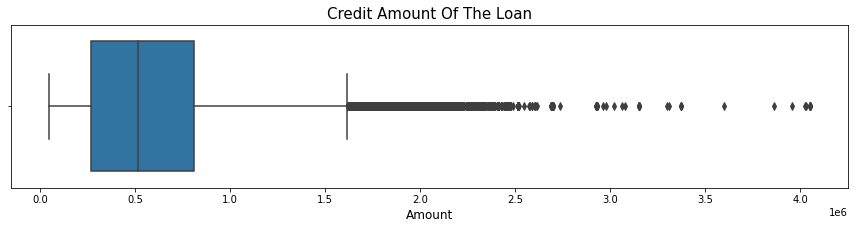

In [33]:
# plot the boxplot of Amount Credit

plt.figure(figsize=[15,3])
sns.boxplot(ad.AMT_CREDIT)
plt.title('Credit Amount Of The Loan', fontsize=15)
plt.xlabel('Amount', fontsize=12)
plt.show()

**Inference:**
* The median almost divides the IQR equally, but the max whisker is much longer than the min whisker.
* There are many outliers in credit amount as per boxplot, most significant ones being above 2.5.

In [34]:
# Check quantiles of AMT_CREDIT

ad.AMT_CREDIT.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995])

0.500     513531.0
0.600     604152.0
0.700     755190.0
0.800     900000.0
0.900    1132573.5
0.950    1350000.0
0.990    1842768.0
0.995    2013840.0
Name: AMT_CREDIT, dtype: float64

In [35]:
# Description of columns where AMT_CREDIT is above 99th percentile

ad[ad.AMT_CREDIT>1842768].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3061.000000,3061.000000,3061.000000,3.061000e+03,3.061000e+03,3061.000000,3.061000e+03,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.0,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3058.000000,3058.000000,3058.000000,3058.000000,3061.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000
mean,279203.236851,0.040836,0.410650,3.352846e+05,2.135192e+06,67847.046880,1.954450e+06,0.028556,45.079386,42280.209082,-4621.497877,-3042.560601,1.0,0.877164,0.192747,0.999347,0.342698,0.093434,2.253839,1.770010,1.733420,12.735054,0.034956,0.114342,0.090167,0.062398,0.180660,0.142764,1.282211,0.101373,1.264552,0.064094,-971.950996,0.004746,0.007302,0.033589,0.417306,0.247536,1.240964
std,102805.870253,0.197943,0.716932,2.109895e+05,2.585202e+05,22674.316658,2.772743e+05,0.020985,10.465719,120719.354191,3419.433321,1534.173584,0.0,0.328302,0.394521,0.025557,0.474689,0.291087,0.840900,0.616782,0.598602,3.414987,0.183698,0.318278,0.286467,0.241916,0.384799,0.349889,2.187143,0.361083,2.165010,0.277517,925.803943,0.068742,0.126557,0.199442,1.103156,0.586608,1.573029
min,100219.000000,0.000000,0.000000,2.565000e+04,1.842952e+06,42025.500000,1.548000e+06,0.001276,21.000000,-15516.000000,-16105.000000,-6206.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191646.000000,0.000000,0.000000,2.250000e+05,1.971072e+06,55507.500000,1.800000e+06,0.010147,37.000000,-3422.000000,-6938.000000,-4347.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1623.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276799.000000,0.000000,0.000000,2.925000e+05,2.013840e+06,63351.000000,1.800000e+06,0.022800,45.000000,-1675.000000,-4151.000000,-3321.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370894.000000,0.000000,1.000000,3.825000e+05,2.250000e+06,70780.500000,2.250000e+06,0.035792,54.000000,-497.000000,-1636.000000,-1768.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,456155.000000,1.000000,4.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,365243.000000,0.000000,-4.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,23.000000,4.000000,0.000000,1.000000,3.000000,3.000000,14.000000,4.000000,9.000000


**Inference:** 
* Out of total 306207 applicants 0.99 applicantions have loan amount more than the 99 percentile loan amount which is at 1842768.
* This value is far from our mean value: 513531.
* So as per our analysis we should consider loan amount beyound 1842768 as outlier.

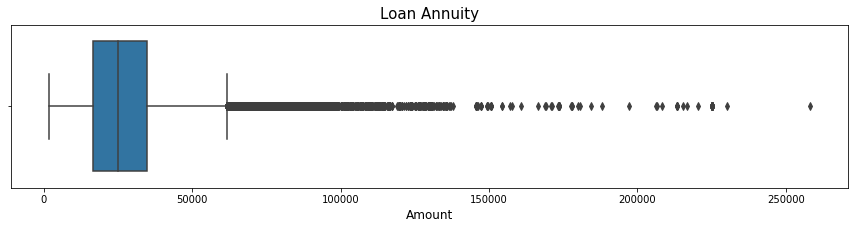

In [36]:
# plot the boxplot of Amount Annuity

plt.figure(figsize=[15,3])
sns.boxplot(ad.AMT_ANNUITY)
plt.title('Loan Annuity', fontsize=15)
plt.xlabel('Amount', fontsize=12)
plt.show()

**Inference:** 
* The median almost divides the IQR equally, but the max whisker is noticably higher than the min whisker.
* There are many outliers in loan annuity as per boxplot, most significant one being above 250000.

In [37]:
# Check quantiles of AMT_ANNUITY

ad.AMT_ANNUITY.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995])

0.500    24930.0
0.600    28080.0
0.700    32017.5
0.800    37557.0
0.900    45954.0
0.950    53325.0
0.990    70006.5
0.995    79758.0
Name: AMT_ANNUITY, dtype: float64

In [38]:
# Check mean of AMT_ANNUITY

round(ad.AMT_ANNUITY.mean(),2)

27122.12

In [39]:
# Description of columns where AMT_ANNUITY is above 99th percentile

ad[ad.AMT_ANNUITY>70006.5].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3056.000000,3056.000000,3056.000000,3.056000e+03,3.056000e+03,3056.000000,3.056000e+03,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.0,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3052.000000,3052.000000,3052.000000,3052.000000,3056.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,276060.243128,0.036976,0.436191,3.553664e+05,1.408485e+06,87456.927192,1.335303e+06,0.028699,44.575262,41064.403469,-4695.339987,-3012.098822,1.0,0.880563,0.195353,0.999346,0.330170,0.111584,2.265052,1.779777,1.743128,12.712042,0.039921,0.117147,0.089332,0.065118,0.191754,0.153141,1.132700,0.092071,1.116645,0.062254,-1046.148233,0.007089,0.008271,0.040173,0.335565,0.288696,1.745175
std,101088.522540,0.188735,0.738370,3.619053e+05,5.991271e+05,22763.283571,5.523616e+05,0.021026,10.698558,119248.744314,3393.799711,1529.548823,0.0,0.324355,0.396537,0.025578,0.470351,0.314905,0.876182,0.616943,0.596596,3.471870,0.195807,0.321648,0.285270,0.246774,0.393745,0.360183,2.073166,0.325437,2.052449,0.258688,872.540310,0.088487,0.138701,0.261762,0.976900,0.610967,1.789793
min,100071.000000,0.000000,0.000000,4.500000e+04,5.940000e+05,70015.500000,5.535000e+05,0.001276,22.000000,-16632.000000,-15796.000000,-6206.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191598.250000,0.000000,0.000000,2.250000e+05,9.227160e+05,73444.500000,9.000000e+05,0.010276,36.000000,-3364.250000,-7016.750000,-4320.500000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1634.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272443.500000,0.000000,0.000000,3.102075e+05,1.327959e+06,79762.500000,1.278000e+06,0.024610,44.000000,-1715.000000,-4270.000000,-3305.500000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-833.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,363326.000000,0.000000,1.000000,4.050000e+05,1.865895e+06,93204.000000,1.800000e+06,0.035792,54.000000,-610.000000,-1738.500000,-1746.750000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-354.750000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456125.000000,1.000000,4.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,365243.000000,0.000000,-2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.000000,23.000000,3.000000,0.000000,2.000000,4.000000,8.000000,14.000000,6.000000,12.000000


**Inference:** 
* Out of total 306207, 0.99% applicants have loan annuity more than the 99 percentile loan annuity which is at 70006.5. 
* This value is far from our mean value: 27122. 
* So as per our analysis, we should consider Loan annuity beyond 70006.5 as outlier.

In [40]:
#check value counts of REGION_RATING_CLIENT
ad.REGION_RATING_CLIENT.value_counts()

2    225996
3     48164
1     32047
Name: REGION_RATING_CLIENT, dtype: int64

In [41]:
#check value counts of REG_REGION_NOT_LIVE_REGION
print(ad.REG_REGION_NOT_LIVE_REGION.value_counts())

0    301565
1      4642
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


In [42]:
#check value counts of HOUR_APPR_PROCESS_START
print(ad.HOUR_APPR_PROCESS_START.value_counts())

10    37584
11    37072
12    34076
13    30820
14    27552
9     27289
15    24719
16    20289
8     15067
17    14817
7      9104
18     9009
6      5826
19     3834
5      3627
4      2082
3      1224
20     1191
21      405
2       303
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64


In [43]:
#check value counts of REG_REGION_NOT_WORK_REGION
ad.REG_REGION_NOT_WORK_REGION.value_counts()

0    290671
1     15536
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [44]:
#check value counts of REGION_RATING_CLIENT_W_CITY
ad.REGION_RATING_CLIENT_W_CITY.value_counts()

2    228492
3     43704
1     34011
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [45]:
#check value counts of LIVE_REGION_NOT_WORK_REGION
ad.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    293773
1     12434
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [46]:
#check value counts of REG_CITY_NOT_LIVE_CITY
ad.REG_CITY_NOT_LIVE_CITY.value_counts()

0    282275
1     23932
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [47]:
#check value counts of REG_CITY_NOT_WORK_CITY
ad.REG_CITY_NOT_WORK_CITY.value_counts()

0    235632
1     70575
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [48]:
#check value counts of LIVE_CITY_NOT_WORK_CITY
ad.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    251216
1     54991
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [49]:
#Dropping columns LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY, REG_CITY_NOT_LIVE_CITY, LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION 
# because they have only 0 and 1 values and providing no insights in finding defaulter. 
ad.drop(['LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
         'NAME_TYPE_SUITE'], axis =1, inplace=True)

In [50]:
#check shape of application data
ad.shape

(306207, 44)

Checking Data count of NAME_FAMILY_STATUS 
Married                 195641
Single / not married     45197
Civil marriage           29659
Separated                19695
Widow                    16015
Name: NAME_FAMILY_STATUS, dtype: int64


Checking Data count of NAME_FAMILY_STATUS after replacing 
Married                 225300
Single / not married     45197
Separated                19695
Widow                    16015
Name: NAME_FAMILY_STATUS, dtype: int64


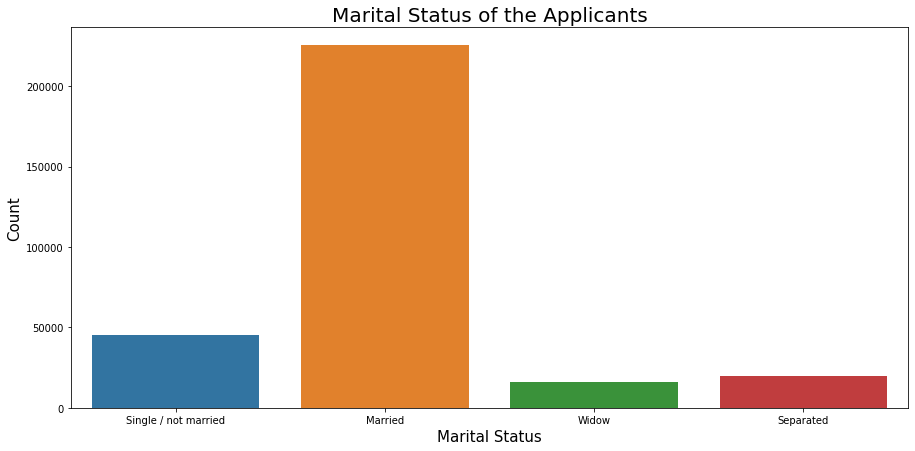

In [51]:
# Checking the Maritial Status of the Applicants_data
print("Checking Data count of NAME_FAMILY_STATUS ")
print(ad.NAME_FAMILY_STATUS.value_counts())

# Replacing Civil marriage with married 
ad["NAME_FAMILY_STATUS"].replace("Civil marriage","Married",inplace=True)

# Check the count again
print("\n\nChecking Data count of NAME_FAMILY_STATUS after replacing ")
print(ad.NAME_FAMILY_STATUS.value_counts())

# Plot marital status of applicants
plt.figure(figsize=[15,7])
plt.title('Marital Status of the Applicants', fontsize=20)
sns.countplot(ad["NAME_FAMILY_STATUS"])
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

**Inference:** 
* Maximum loan application come from married people.
* Least loan application come from widows.

Checking Data count of NAME_FAMILY_STATUS 
0     214463
1      60855
2      26639
3       3697
4        427
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


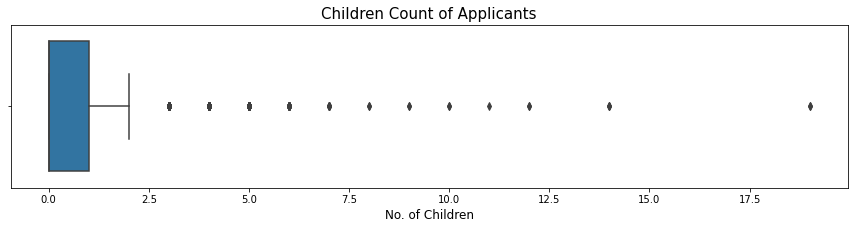

Check quantiles of CNT_CHILDREN
0.5000    0.0
0.6000    0.0
0.7000    0.0
0.8000    1.0
0.9000    2.0
0.9500    2.0
0.9900    3.0
0.9995    4.0
Name: CNT_CHILDREN, dtype: float64


In [52]:
# Checking the number of children of the Applicants
print("Checking Data count of NAME_FAMILY_STATUS ")
print(ad.CNT_CHILDREN.value_counts())
ad.CNT_CHILDREN.describe()

# Boxplot of children count of applicants
plt.figure(figsize=[15,3])
sns.boxplot(ad.CNT_CHILDREN)
plt.title('Children Count of Applicants', fontsize=15)
plt.xlabel('No. of Children', fontsize=12)
plt.show()

# Check quantiles of CNT_CHILDREN
print("Check quantiles of CNT_CHILDREN")
print(ad.CNT_CHILDREN.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.9995]))

In [53]:
#Checking the data of applicant having kids more than 6 kids
ad[ad.CNT_CHILDREN>3].describe()

#Plotting distribution of children
#sns.countplot(ad['CNT_CHILDREN'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,553.000000,553.000000,553.000000,553.000000,5.530000e+02,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000,553.0,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,552.000000,552.000000,552.000000,552.000000,553.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,270913.750452,0.128391,4.470163,169404.737794,6.032930e+05,28086.436709,5.361143e+05,0.019984,38.893309,11600.318264,-3441.070524,-3101.772152,1.0,0.962025,0.303797,0.996383,0.258590,0.045208,6.403255,2.121157,2.115732,11.764919,1.342391,0.139493,1.311594,0.110507,-893.538879,0.006466,0.010776,0.028017,0.250000,0.265086,1.857759
std,102218.706086,0.334827,1.468114,102063.101964,4.116165e+05,16795.907212,3.807420e+05,0.014023,6.677985,70348.864065,2718.819412,1543.454758,0.0,0.191308,0.460313,0.060084,0.438256,0.207948,1.440281,0.522817,0.525773,3.088501,2.131046,0.434992,2.113995,0.386381,760.215558,0.103717,0.122484,0.165200,1.042302,0.617237,1.797894
min,101324.000000,0.000000,4.000000,29250.000000,5.094000e+04,3847.500000,4.500000e+04,0.001333,23.000000,-13285.000000,-12416.000000,-6125.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-3761.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181411.000000,0.000000,4.000000,112500.000000,2.826900e+05,17149.500000,2.385000e+05,0.009175,35.000000,-3137.000000,-5084.000000,-4378.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,-1478.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,266743.000000,0.000000,4.000000,135000.000000,4.975200e+05,25447.500000,4.500000e+05,0.018850,38.000000,-1818.000000,-2821.000000,-3486.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,356668.000000,0.000000,4.000000,202500.000000,8.086500e+05,35581.500000,6.750000e+05,0.026392,42.000000,-876.000000,-1161.000000,-1859.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,2.000000,2.000000,14.000000,2.000000,0.000000,2.000000,0.000000,-292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456016.000000,1.000000,19.000000,810000.000000,2.250000e+06,225000.000000,2.250000e+06,0.072508,68.000000,365243.000000,0.000000,-15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,21.000000,12.000000,4.000000,12.000000,4.000000,0.000000,2.000000,2.000000,1.000000,16.000000,3.000000,8.000000


**Inference:** Out of 306207 only 553 applicants has more than 3 kids which we can consider as our outlier of number of kids.  

Checking Data count of NAME_FAMILY_STATUS 
Working                 158126
Commercial associate     71254
Pensioner                55164
State servant            21609
Unemployed                  22
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


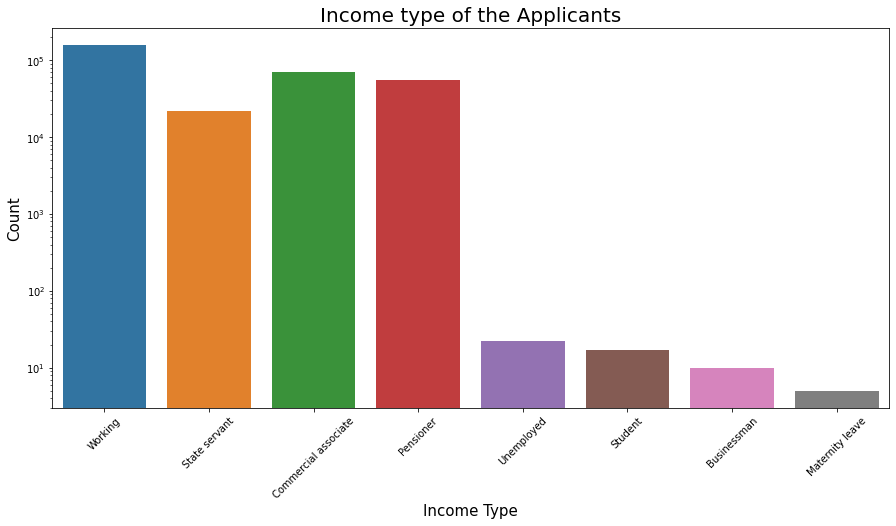

In [54]:
# Checking the Income type of the Applicants
print("Checking Data count of NAME_FAMILY_STATUS ")
print(ad.NAME_INCOME_TYPE.value_counts())
ad.NAME_INCOME_TYPE.describe()

#
plt.figure(figsize=[15,7])
plt.title('Income type of the Applicants', fontsize=20)
g = sns.countplot(ad["NAME_INCOME_TYPE"])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.xlabel('Income Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yscale('log')
plt.show()

**Inference:** Most application we got from 3 income type Working, State Servant and Commercial associate. 

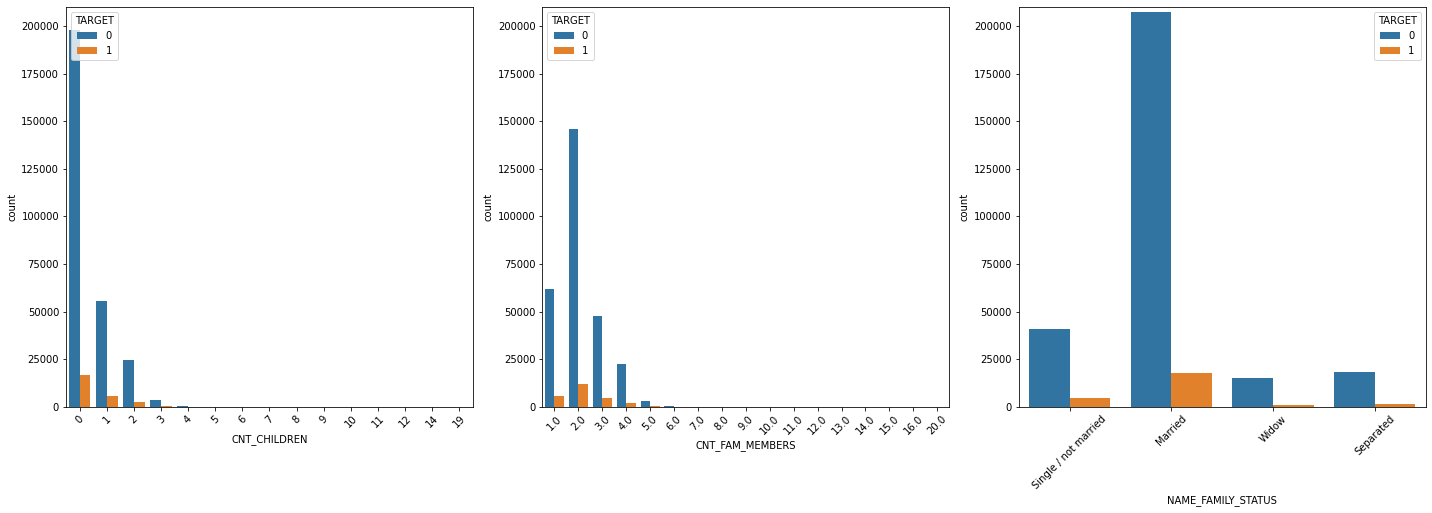

In [55]:
fig=plt.subplots(figsize=(20, 20))


plt.subplot(3, 3, 1, ylim=(0, 210000))
plt.subplots_adjust(hspace = 1.0)
sns.countplot(ad.CNT_CHILDREN, hue=ad["TARGET"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(3, 3, 2, ylim=(0, 210000))
plt.subplots_adjust(hspace = 1.0)
sns.countplot(ad.CNT_FAM_MEMBERS, hue=ad["TARGET"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(3, 3, 3, ylim=(0, 210000))
plt.subplots_adjust(hspace = 1.0)
sns.countplot(ad.NAME_FAMILY_STATUS, hue=ad["TARGET"])
plt.xticks(rotation=45)
plt.tight_layout()
    

plt.show()

In [56]:
ad.groupby(["NAME_FAMILY_STATUS","CNT_CHILDREN","CNT_FAM_MEMBERS"])["TARGET"].sum()/len(ad)*100

NAME_FAMILY_STATUS    CNT_CHILDREN  CNT_FAM_MEMBERS
Married               0             2.0                3.559683
                      1             3.0                1.425833
                      2             4.0                0.685157
                      3             5.0                0.106464
                      4             6.0                0.017635
                      5             7.0                0.001959
                      6             8.0                0.001959
                      7             9.0                0.000000
                      8             10.0               0.000000
                      9             11.0               0.000327
                      10            12.0               0.000000
                      11            13.0               0.000327
                      12            14.0               0.000000
                      14            16.0               0.000000
Separated             0             1.0             

**Inference:** Most of the defaulters are from Married and Single category

### Checking outliers and perfoming univariate analysis of Previous application dataframe 

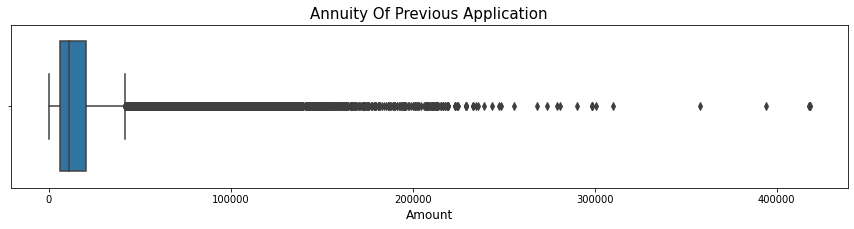

In [57]:
# plot the boxplot of Amount Annuity

plt.figure(figsize=[15,3])
sns.boxplot(pa.AMT_ANNUITY)
plt.title('Annuity Of Previous Application', fontsize=15)
plt.xlabel('Amount', fontsize=12)
plt.show()

In [58]:
# Check quantiles of Amount Annuity
print("Check quantiles of AMT_ANNUITY")
print(pa.AMT_ANNUITY.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99]))

Check quantiles of AMT_ANNUITY
0.50    11250.0000
0.60    13844.2500
0.70    17783.1405
0.80    23638.5000
0.90    34703.8200
0.95    45336.7800
0.99    69685.8174
Name: AMT_ANNUITY, dtype: float64


In [59]:
#Checking the data of Amount Annuity having more than 69685 amount
pa[pa.AMT_ANNUITY>69685].describe()


,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,12981.000000,12981.000000,1.298100e+04,1.298100e+04,1.298100e+04,12981.000000,12981.000000,12981.000000,12981.000000
mean,278910.105924,89974.684108,1.293629e+06,1.359433e+06,1.293629e+06,0.998922,-601.174563,150.679301,21.671751
std,102914.437116,24655.754424,6.751051e+05,7.252081e+05,6.751051e+05,0.032824,306.457524,2666.028856,15.162815
min,100003.000000,69685.155000,0.000000e+00,2.038545e+05,0.000000e+00,0.000000,-2824.000000,-1.000000,0.000000
25%,189948.000000,74038.230000,8.278335e+05,8.505000e+05,8.278335e+05,1.000000,-773.000000,-1.000000,12.000000
50%,280352.000000,82037.745000,1.129500e+06,1.195101e+06,1.129500e+06,1.000000,-578.000000,-1.000000,18.000000
75%,368958.000000,96568.425000,1.575000e+06,1.668555e+06,1.575000e+06,1.000000,-382.000000,-1.000000,24.000000
max,456228.000000,418058.145000,5.850000e+06,4.509688e+06,5.850000e+06,1.000000,-2.000000,74625.000000,72.000000


**Inference:** There are 12981 values more than 99 percentile and we have notice there are many outliers in AMT_ANNUITY as per boxplot but most significant one being above 300000.


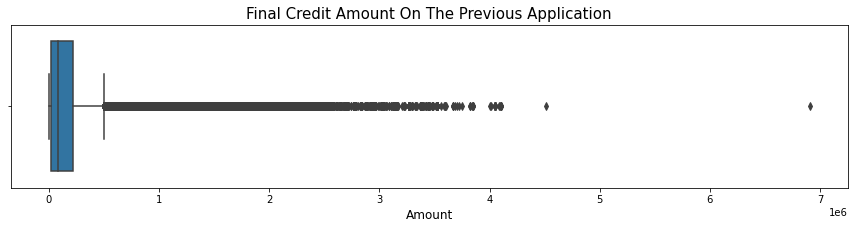

In [60]:
# plot the boxplot of Amount Credit

plt.figure(figsize=[15,3])
sns.boxplot(pa.AMT_CREDIT)
plt.title('Final Credit Amount On The Previous Application', fontsize=15)
plt.xlabel('Amount', fontsize=12)
plt.show()

In [61]:
# Check quantiles of Amount Credit
print("Check quantiles of AMT_CREDIT")
print(pa.AMT_CREDIT.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99]))

Check quantiles of AMT_CREDIT
0.50      80550.00
0.60     116059.50
0.70     167895.00
0.80     270000.00
0.90     533160.00
0.95     886686.75
0.99    1515415.50
Name: AMT_CREDIT, dtype: float64


In [62]:
#Checking the data of Amount Credit for having more than 1515415.50
pa[pa.AMT_CREDIT>1515415].describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,16703.000000,16697.000000,1.670300e+04,1.670300e+04,1.670300e+04,16703.000000,16703.000000,16703.000000,16697.000000
mean,277628.217206,61027.139026,1.775834e+06,1.933117e+06,1.775834e+06,0.999282,-451.145183,21.184757,53.854884
std,102387.394794,23756.946453,4.307049e+05,4.249960e+05,4.307049e+05,0.026795,319.528276,455.153753,11.486251
min,100043.000000,38309.715000,1.102500e+06,1.515416e+06,1.102500e+06,0.000000,-2700.000000,-1.000000,0.000000
25%,188646.500000,45949.410000,1.372500e+06,1.574532e+06,1.372500e+06,1.000000,-629.000000,-1.000000,48.000000
50%,279186.000000,55511.100000,1.710000e+06,1.800000e+06,1.710000e+06,1.000000,-379.000000,-1.000000,60.000000
75%,366528.500000,66752.235000,2.025000e+06,2.215224e+06,2.025000e+06,1.000000,-219.000000,-1.000000,60.000000
max,456215.000000,418058.145000,6.905160e+06,6.905160e+06,6.905160e+06,1.000000,-2.000000,30200.000000,84.000000


**Inference:** There are 16703 outliers in Amount Credit as per boxplot, most significant ones being above 4000000.

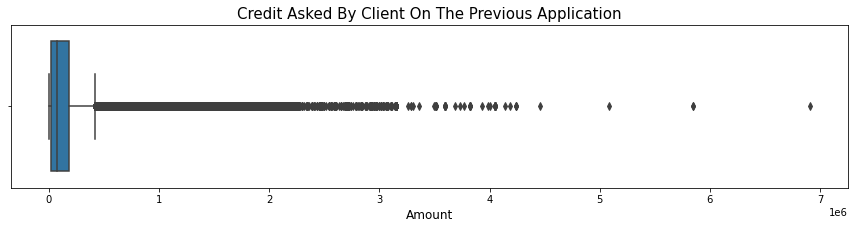

In [63]:
# plot the boxplot of Amount Application of previous applicants

plt.figure(figsize=[15,3])
sns.boxplot(pa.AMT_APPLICATION)
plt.title('Credit Asked By Client On The Previous Application', fontsize=15)
plt.xlabel('Amount', fontsize=12)
plt.show()

In [64]:
# Check quantiles of Amount Application of previous applicants
print("Check quantiles of AMT_APPLICATION")
print(pa.AMT_APPLICATION.quantile([0.5,0.6,0.7,0.8,0.9,0.95,0.99]))

Check quantiles of AMT_APPLICATION
0.50      71055.00
0.60     103848.93
0.70     144832.50
0.80     229050.00
0.90     450000.00
0.95     787500.00
0.99    1350000.00
Name: AMT_APPLICATION, dtype: float64


In [65]:
#Checking the data of applicant having kids more than 6 kids
pa[pa.AMT_APPLICATION>1350000.00].describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,15952.000000,15941.000000,1.595200e+04,1.595200e+04,1.595200e+04,15952.000000,15952.000000,15952.000000,15941.000000
mean,277280.811058,63796.692562,1.804435e+06,1.927177e+06,1.804435e+06,0.998872,-483.135093,50.959566,50.804216
std,102486.021132,24631.593878,4.245984e+05,4.519241e+05,4.245984e+05,0.033574,343.163137,1162.784266,13.467019
min,100043.000000,14601.690000,1.350108e+06,4.173390e+05,1.350108e+06,0.000000,-2912.000000,-1.000000,0.000000
25%,188160.500000,48923.325000,1.485000e+06,1.575000e+06,1.485000e+06,1.000000,-653.000000,-1.000000,42.000000
50%,278590.000000,58437.630000,1.800000e+06,1.812456e+06,1.800000e+06,1.000000,-426.000000,-1.000000,60.000000
75%,366395.250000,70221.420000,2.025000e+06,2.220260e+06,2.025000e+06,1.000000,-242.000000,-1.000000,60.000000
max,456215.000000,418058.145000,6.905160e+06,6.905160e+06,6.905160e+06,1.000000,-2.000000,74625.000000,84.000000


**Inference:** There are 15952 outliers in Amount Application as per boxplot but most significant ones being above 4000000.

In [66]:
# #Correlation between Income, Loan Amount and Amount Annuity
# pd.pivot_table(data=ad, index ="AMT_INCOME_TOTAL" , columns ="NAME_FAMILY_STATUS", values = "AMT_CREDIT")

# Creating bins for some variables

In [67]:
# Create income bins from AMT_INCOME_TOTAL

ad['AMT_INCOME_BINS'] = pd.cut(ad.AMT_INCOME_TOTAL, [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000],
                                labels=['under 50000', '50000 to 100000','100000 to 150000','150000 to 200000','200000 to 250000','250000 to 300000',
                                        '300000 to 350000', '350000 to 400000', '400000 to 450000', '450000 and above'])

# Value counts of income bins

ad['AMT_INCOME_BINS'].value_counts()

100000 to 150000    91212
150000 to 200000    64061
50000 to 100000     58912
200000 to 250000    47927
250000 to 300000    16986
300000 to 350000     8833
350000 to 400000     5767
400000 to 450000     4903
under 50000          4495
450000 and above      430
Name: AMT_INCOME_BINS, dtype: int64

In [68]:
# Create Age bins from DAYS_BIRTH
labels=['20 to 30','30 to 35', '35 to 40', '40 to 45','45 to 50','50 to 55', '55 to 60','55 to 60','Above 65']
ad['DAYS_BIRTH_BINS'] = pd.cut(ad.DAYS_BIRTH, [20,25,30,35,40,45,50,55,60,65], labels=labels,ordered=False)

# Value counts of Age bins
ad['DAYS_BIRTH_BINS'].value_counts()

55 to 60    67611
40 to 45    42874
45 to 50    40548
35 to 40    39150
50 to 55    34784
30 to 35    34077
Above 65    26453
20 to 30    13829
Name: DAYS_BIRTH_BINS, dtype: int64

# Data imbalance. Finding the ratios of data imbalance.

### Bivariate and Multivariate Analysis on application_data

In [69]:
# Check distribution of Target variable. 1 - client with payment difficulties, 0 - all other cases
target_pct = round(ad.TARGET.value_counts()/ad.TARGET.value_counts().sum()*100,2)
target_pct

0    91.92
1     8.08
Name: TARGET, dtype: float64

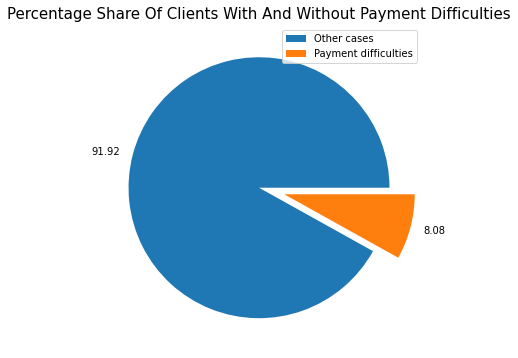

In [70]:
# Plot Target variable
plt.figure(figsize=[6,6])
explode = (0,0.2)
mylabels = ['Other cases','Payment difficulties']
plt.pie(ad.TARGET.value_counts(), explode =explode, labels=target_pct)
plt.title('Percentage Share Of Clients With And Without Payment Difficulties', fontsize=15)
plt.legend(mylabels)
plt.show()

In [71]:
# Creating dataframes for both target values
ad_target_0 = ad.loc[ad.TARGET==0]
ad_target_1 = ad.loc[ad.TARGET==1]

print('Shape of target 0 (No Payment difficulties):',ad_target_0.shape)
print('Shape of target 1 (Payment difficulties):',ad_target_1.shape)

Shape of target 0 (No Payment difficulties): (281452, 46)
Shape of target 1 (Payment difficulties): (24755, 46)


In [72]:
# Finding the ratio of data imbalance of Target
print('Ratio of data imbalance between target 0 and target 1 is:', str(round(len(ad_target_0)/len(ad_target_1)))+':1')

Ratio of data imbalance between target 0 and target 1 is: 11:1


In [73]:
# Finding percentage of applicant genders

gender_pct = round(ad.CODE_GENDER.value_counts()/ad.CODE_GENDER.value_counts().sum()*100,2)
gender_pct

F    65.85
M    34.15
Name: CODE_GENDER, dtype: float64

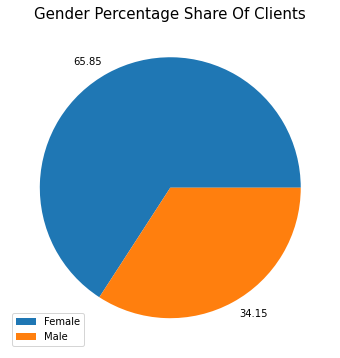

In [74]:
# Plot gender variable

plt.figure(figsize=[6,6])
mylabels = ['Female','Male']
plt.pie(ad.CODE_GENDER.value_counts(), labels=gender_pct)
plt.title('Gender Percentage Share Of Clients', fontsize=15)
plt.legend(mylabels)
plt.show()

In [75]:
# Finding the ratio of data imbalance of gender

print('Ratio of data imbalance between female and male is:', str(round(len(ad.loc[ad.CODE_GENDER=='F'])/len(ad.loc[ad.CODE_GENDER=='M'])))+':1')

Ratio of data imbalance between female and male is: 2:1


In [76]:
# Finding percentage of car ownership

car_pct = round(ad.FLAG_OWN_CAR.value_counts()/ad.FLAG_OWN_CAR.value_counts().sum()*100,2)
car_pct

N    65.98
Y    34.02
Name: FLAG_OWN_CAR, dtype: float64

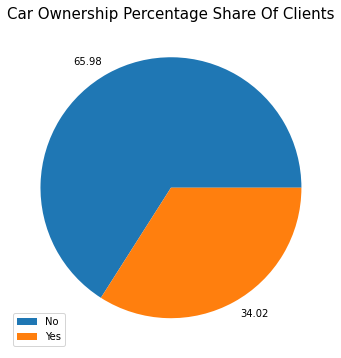

In [77]:
# Plot car ownership variable

plt.figure(figsize=[6,6])
mylabels = ['No','Yes']
plt.pie(ad.FLAG_OWN_CAR.value_counts(), labels=car_pct)
plt.title('Car Ownership Percentage Share Of Clients', fontsize=15)
plt.legend(mylabels)
plt.show()

In [78]:
# Finding the ratio of data imbalance of car ownership

print('Ratio of data imbalance between Yes and No of car ownership is: 1:'+ str(round(len(ad.loc[ad.FLAG_OWN_CAR=='N'])/len(ad.loc[ad.FLAG_OWN_CAR=='Y']))))

Ratio of data imbalance between Yes and No of car ownership is: 1:2


In [79]:
# Finding percentage of realty ownership

realty_pct = round(ad.FLAG_OWN_REALTY.value_counts()/ad.FLAG_OWN_REALTY.value_counts().sum()*100,2)
realty_pct

Y    69.51
N    30.49
Name: FLAG_OWN_REALTY, dtype: float64

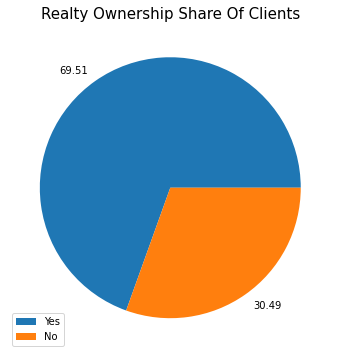

In [80]:
# Plot realty ownership variable

plt.figure(figsize=[6,6])
mylabels = ['Yes','No']
plt.pie(ad.FLAG_OWN_REALTY.value_counts(), labels=realty_pct)
plt.title('Realty Ownership Share Of Clients', fontsize=15)
plt.legend(mylabels)
plt.show()

In [81]:
# Finding the ratio of data imbalance of realty ownership

print('Ratio of data imbalance of Yes and No of realty ownership:', str(round(len(ad.loc[ad.FLAG_OWN_REALTY=='Y'])/len(ad.loc[ad.FLAG_OWN_REALTY=='N'])))+':1')

Ratio of data imbalance of Yes and No of realty ownership: 2:1


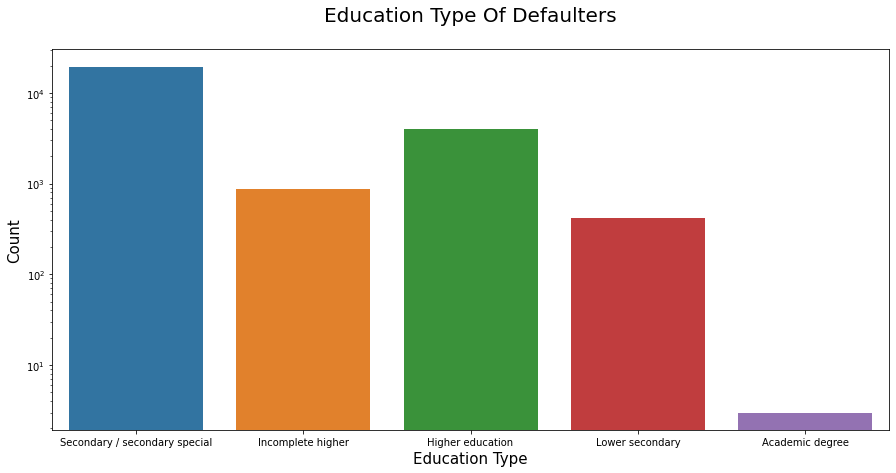

In [82]:
# Plot Education Type Of Defaulters

plt.figure(figsize=[15,7])
sns.countplot(ad_target_1.NAME_EDUCATION_TYPE)
plt.title('Education Type Of Defaulters\n', fontsize=20)
plt.xlabel('Education Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yscale('log')
plt.show()

**Inference:**
* Most defaulters came from Secondary and Higher education background.
* Least defaulter came from Academic degree background

Target 0
 Cash loans         254040
Revolving loans     27412
Name: NAME_CONTRACT_TYPE, dtype: int64

Target 1
 Cash loans         23173
Revolving loans     1582
Name: NAME_CONTRACT_TYPE, dtype: int64


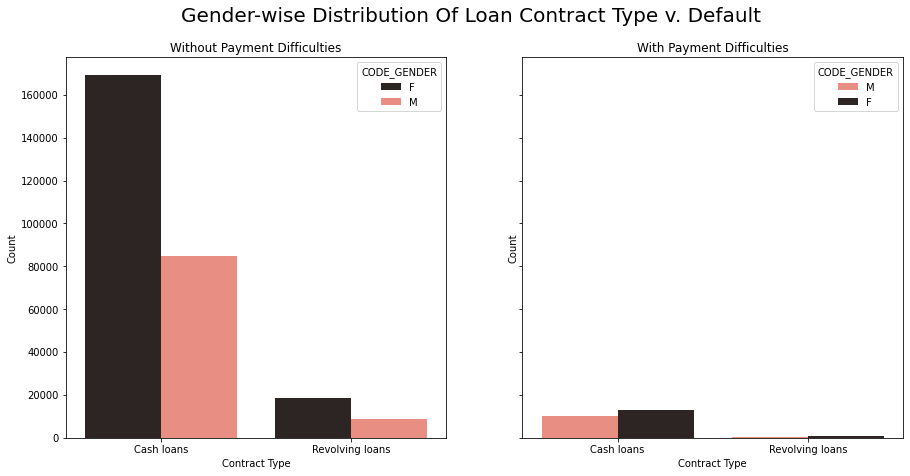

In [83]:
# Check contract type values

print('Target 0\n',ad_target_0.NAME_CONTRACT_TYPE.value_counts())
print('\nTarget 1\n',ad_target_1.NAME_CONTRACT_TYPE.value_counts())

# 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.countplot(data=ad_target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='dark:salmon', ax=ax1).set(title='Without Payment Difficulties', xlabel='Contract Type', ylabel='Count')
sns.countplot(data=ad_target_1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='dark:salmon_r', ax=ax2).set(title='With Payment Difficulties', xlabel='Contract Type', ylabel='Count')
plt.suptitle('Gender-wise Distribution Of Loan Contract Type v. Default\n', fontsize=20)
plt.show()

**Inference:**
* Demand for cash loans is significantly higher than revolving loans.
* Demand for both types of loan contracts are almost twice that of males. However, the default rate is almost equal.

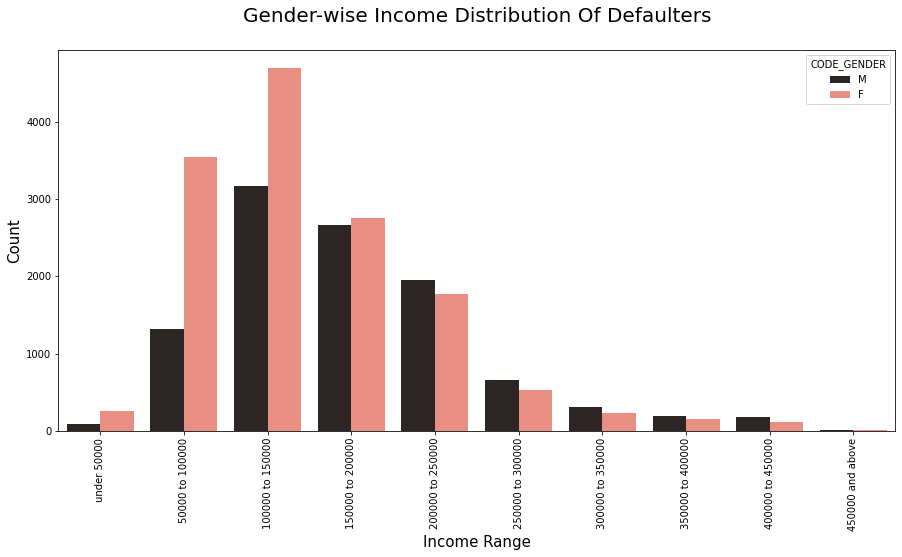

In [84]:
# Plot gender-wise Income Distribution Of Defaulters

plt.figure(figsize=[15,7])
sns.countplot(data=ad_target_1, x='AMT_INCOME_BINS', hue='CODE_GENDER', palette='dark:salmon')
plt.title('Gender-wise Income Distribution Of Defaulters\n', fontsize=20)
plt.xlabel('Income Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Inference:**
* Most defaulters for both Male and Female come from the 100000 to 150000 income range.
* There are more female defaulters in income range 250000 and below.
* There are more male defaulters in income range 250000 and above.

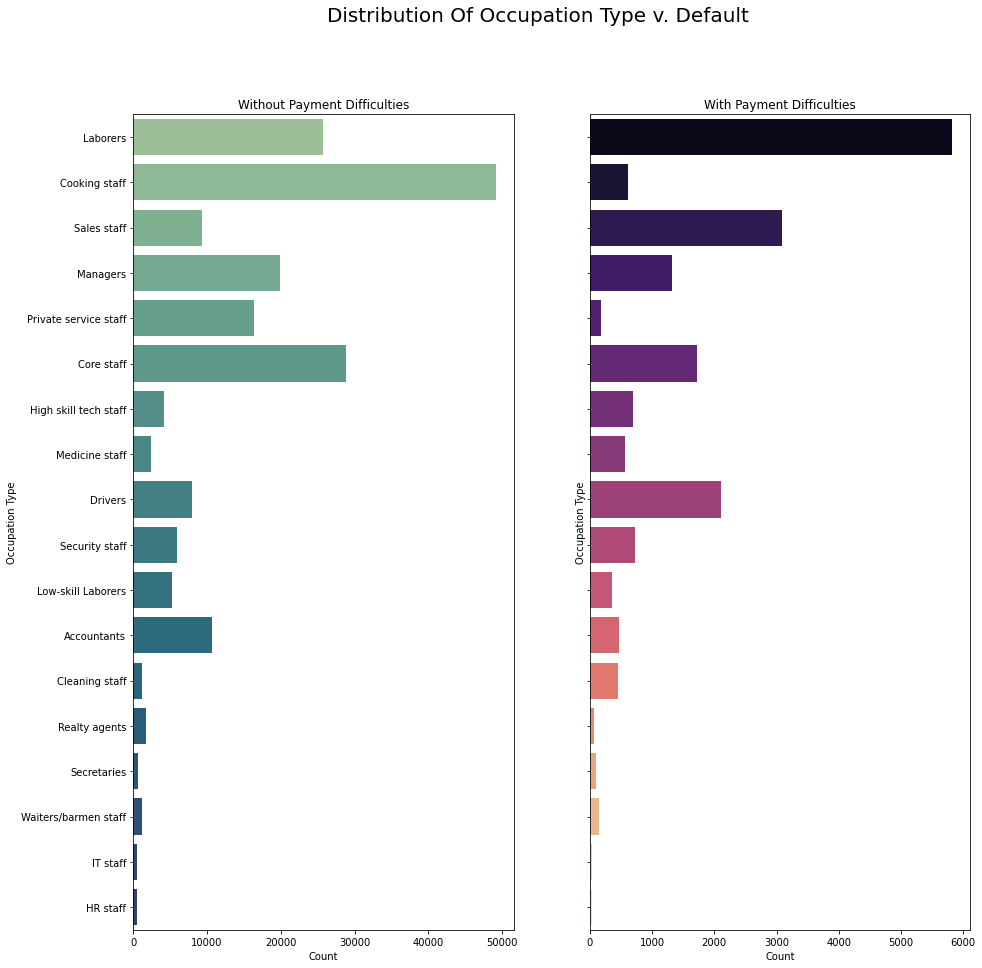

In [85]:
# Plot distribution Of Occupation Type v. Default

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,15], sharey=True)
sns.countplot(data=ad_target_0, y='OCCUPATION_TYPE', palette='crest', ax=ax1).set(title='Without Payment Difficulties', ylabel='Occupation Type', xlabel='Count')
sns.countplot(data=ad_target_1, y='OCCUPATION_TYPE', palette='magma', ax=ax2).set(title='With Payment Difficulties', ylabel='Occupation Type', xlabel='Count')
plt.suptitle('Distribution Of Occupation Type v. Default', fontsize=20)
plt.show()

**Inference:**
Among different occupations,
* Cooking staff had the least count of clients with difficulty in payment of loan.
* Labourers had the highest count of clients with difficulty in payment of loan.

# Numerical - Categorical Correlation Analysis

## Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).

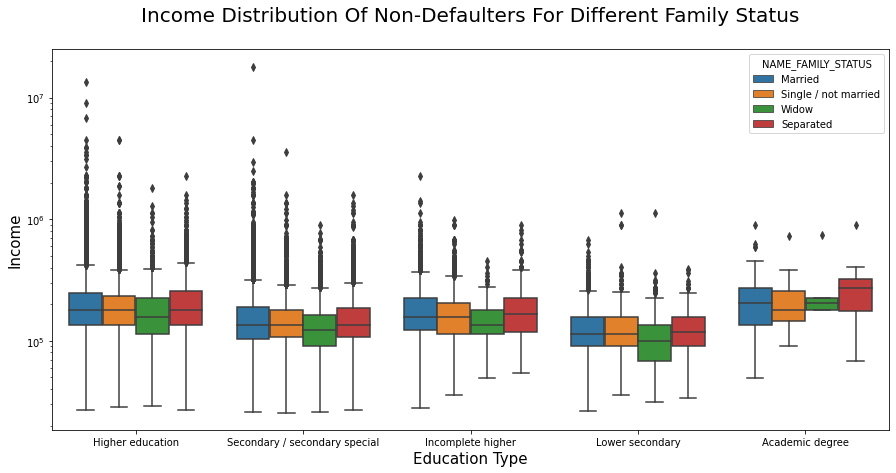

In [86]:
# Plot income distribution of non-defaulters for different family status

plt.figure(figsize=[15,7])
sns.boxplot(data=ad_target_0, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS')
plt.title('Income Distribution Of Non-Defaulters For Different Family Status\n', fontsize=20)
plt.xlabel('Education Type', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.yscale('log')
plt.show()

**Inference:**
* Non-married clients with academic degrees have a much higher minimum whisker than all other categories.
* Married clients with higher education or secondary/secondary special education have significant outliers on the higher side.
* There are no lower outliers for any category.

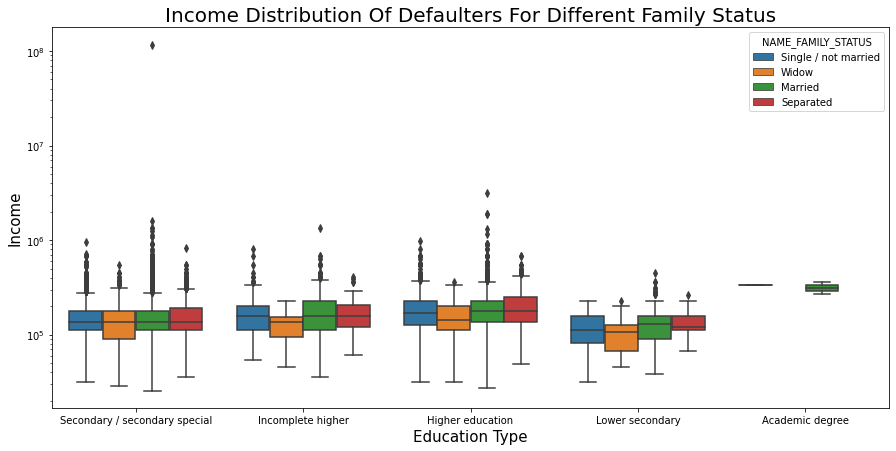

In [87]:
# Plot income distribution of defaulters for different family status

plt.figure(figsize=[15,7])
sns.boxplot(data=ad_target_1, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS')
plt.title('Income Distribution Of Defaulters For Different Family Status', fontsize=20)
plt.xlabel('Education Type', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.yscale('log')
plt.show()

**Inference:**
* For majority of defaulting clients, across all education types, the income is comparatively on the lower side compared to non-defaulters.
* Exceptions to this are outliers in married clients with higher education or secondary/secondary, who are defaulting despite higher income.
* Widows and seperated clients with academic degree, appear to be facing the least payment difficulties.

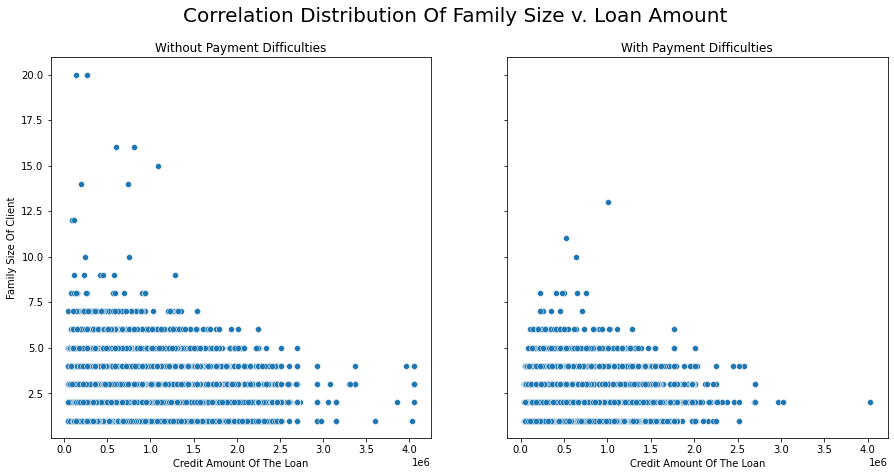

In [88]:
# Plot Correlation Distribution Of Family Size v. Loan Amount

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.scatterplot(data=ad_target_0,x='AMT_CREDIT', y='CNT_FAM_MEMBERS', ax=ax1).set(title='Without Payment Difficulties', xlabel='Credit Amount Of The Loan', ylabel='Family Size Of Client')
sns.scatterplot(data=ad_target_1,x='AMT_CREDIT', y='CNT_FAM_MEMBERS', ax=ax2).set(title='With Payment Difficulties', xlabel='Credit Amount Of The Loan', ylabel='Family Size Of Client')
plt.suptitle('Correlation Distribution Of Family Size v. Loan Amount', fontsize=20)
plt.show()

**Inference:**
* There is no correlation between family size of client and the credit amount, for both defaulters and non-defaulters.
* Infact, clients with extremely large families haven't had payment difficulties.

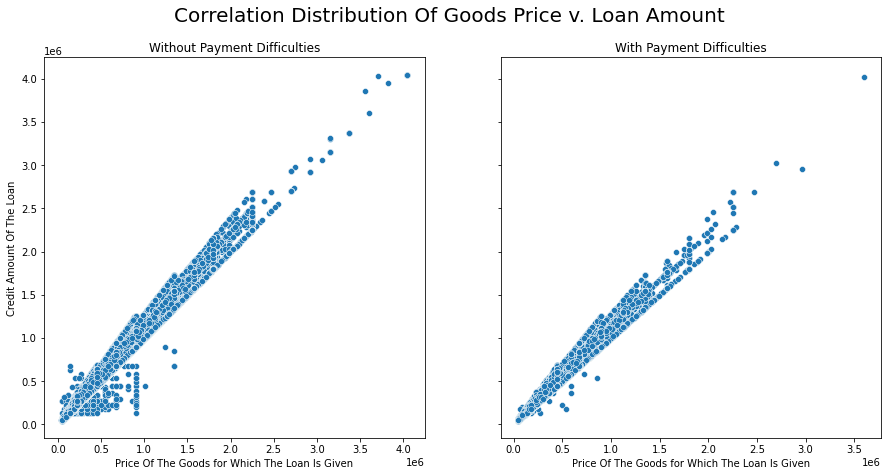

In [89]:
# Plot Correlation Distribution Of Goods Price v. Loan Amount

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.scatterplot(data=ad_target_0,x='AMT_GOODS_PRICE', y='AMT_CREDIT', ax=ax1).set(title='Without Payment Difficulties', ylabel='Credit Amount Of The Loan', xlabel='Price Of The Goods for Which The Loan Is Given')
sns.scatterplot(data=ad_target_1,x='AMT_GOODS_PRICE', y='AMT_CREDIT', ax=ax2).set(title='With Payment Difficulties', ylabel='Credit Amount Of The Loan', xlabel='Price Of The Goods for Which The Loan Is Given')
plt.suptitle('Correlation Distribution Of Goods Price v. Loan Amount', fontsize=20)
plt.show()

**Inference:**
* There is a linear correlation between credit amount of loan and price of goods for which the loan is given. 
* This showns that when the price the goods increases, the credit amount of loan also increases.

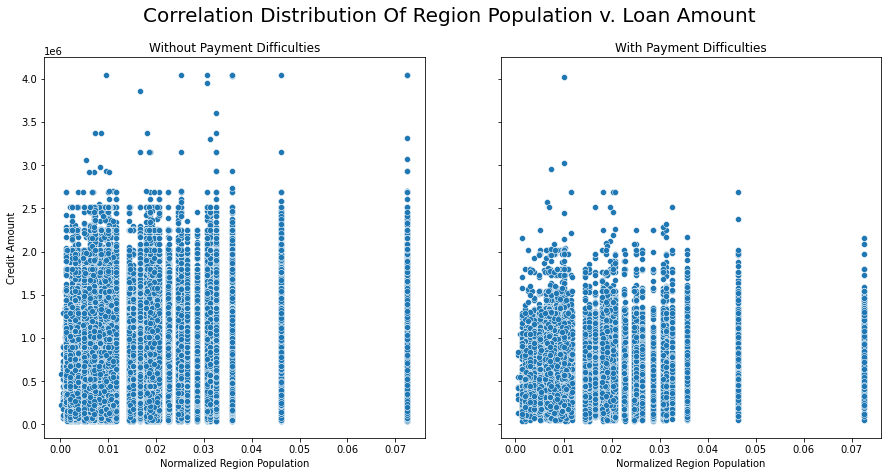

In [90]:
# Plot Correlation Distribution Of clients' region population v. Loan Amount

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.scatterplot(data=ad_target_0,y='AMT_CREDIT', x='REGION_POPULATION_RELATIVE', ax=ax1).set(title='Without Payment Difficulties', ylabel='Credit Amount', xlabel='Normalized Region Population')
sns.scatterplot(data=ad_target_1,y='AMT_CREDIT', x='REGION_POPULATION_RELATIVE', ax=ax2).set(title='With Payment Difficulties', ylabel='Credit Amount', xlabel='Normalized Region Population')
plt.suptitle('Correlation Distribution Of Region Population v. Loan Amount', fontsize=20)
plt.show()

**Inference:**
* For clients without payment difficulties, there is no visible correlation between client's region population and credit amount.
* For clients with payment difficulties, clients with higher credit amount and very low region population have noticable correlation outliers, compared to clients in regions with higher population.

In [91]:
# Numeric features from application data
numeric_features_ad

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

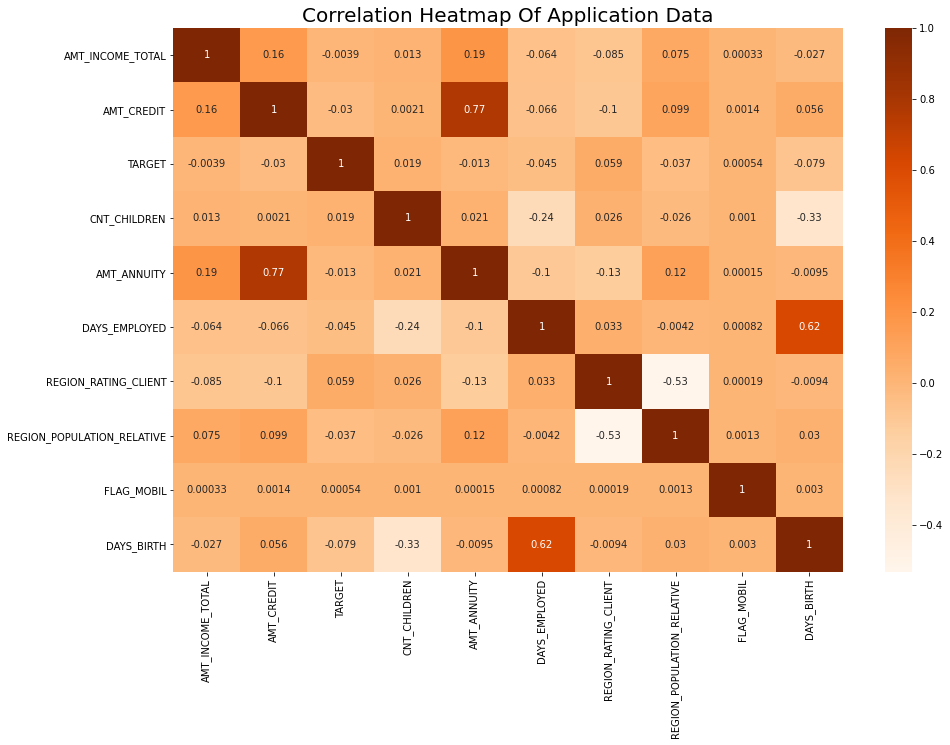

In [92]:
# Correlation HeatMap of Applicant Data
ad_heatmap_data = [ad.AMT_INCOME_TOTAL,ad.AMT_CREDIT,ad.TARGET,ad.CODE_GENDER,ad.CNT_CHILDREN,ad.AMT_ANNUITY,ad.DAYS_EMPLOYED,
              ad.REGION_RATING_CLIENT,ad.REGION_POPULATION_RELATIVE,ad.FLAG_MOBIL,ad.NAME_HOUSING_TYPE,ad.DAYS_BIRTH]
ad_heatmap_headers = ["AMT_INCOME_TOTAL","AMT_CREDIT","TARGET","CODE_GENDER","CNT_CHILDREN","AMT_ANNUITY","DAYS_EMPLOYED",
              "REGION_RATING_CLIENT","REGION_POPULATION_RELATIVE","FLAG_MOBIL","NAME_HOUSING_TYPE","DAYS_BIRTH"]

ad_heatmap = pd. concat(ad_heatmap_data, axis=1, keys=ad_heatmap_headers)

corr = ad_heatmap.corr()
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap Of Application Data', fontsize=20)
sns.heatmap(corr, annot = True, cmap="Oranges")
plt.show()

**Inference:** 
1. High income people take larger credit amount loan along and pay larger loan annuity as well.
2. High population density area pay higher loan annuities.
3. The chances of having payment difficulty is very low with high income people. 
4. If target lives in high population area and has high number of kids, there are higher chances of facing payment difficulty.

In [93]:
# Analysing DAYS_BIRTH values (converted to years)

ad.DAYS_BIRTH.describe()

count    306207.000000
mean         44.069747
std          11.991102
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

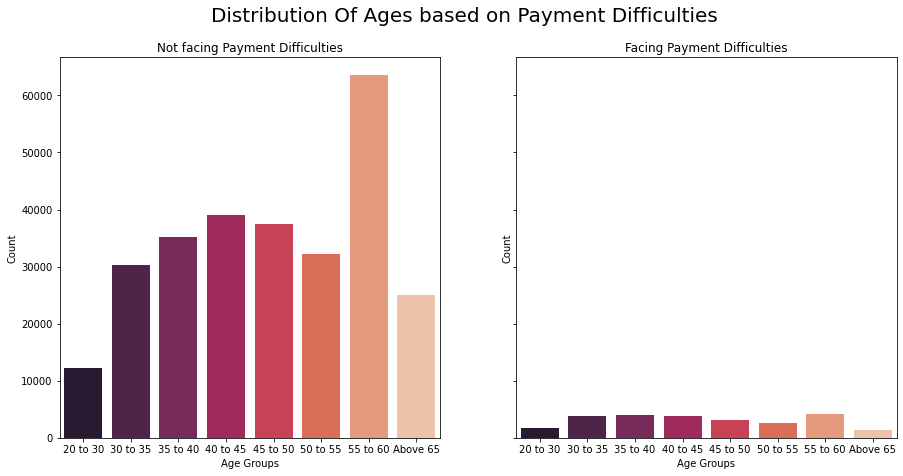

In [94]:
# Plotting Distribution Of Ages based on Payment Difficulties

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
chart1 = sns.countplot(ad_target_0['DAYS_BIRTH_BINS'],ax=ax1,palette="rocket").set(title='Not facing Payment Difficulties',ylabel='Count', xlabel='Age Groups')
chart2 = sns.countplot(ad_target_1['DAYS_BIRTH_BINS'],ax=ax2,palette="rocket").set(title='Facing Payment Difficulties',ylabel='Count', xlabel='Age Groups')
plt.suptitle('Distribution Of Ages based on Payment Difficulties', fontsize=20)
plt.show()

**Inference:**
* While applicants of age group 55 to 60 face most difficulty in payments, they are also the group with least difficulty in payment.
* 20 to 30 group and above 65 group face least difficulty in payment.

In [95]:
# Extracting the numeric features from previous application data

numeric_features_pa = []
for col in pa.columns:
    if pa[col].dtype == float or pa[col].dtype == int:
        numeric_features_pa.append(col)
        
print(numeric_features_pa)

['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [96]:
# Checking top 5 rows of previous application data

pa.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


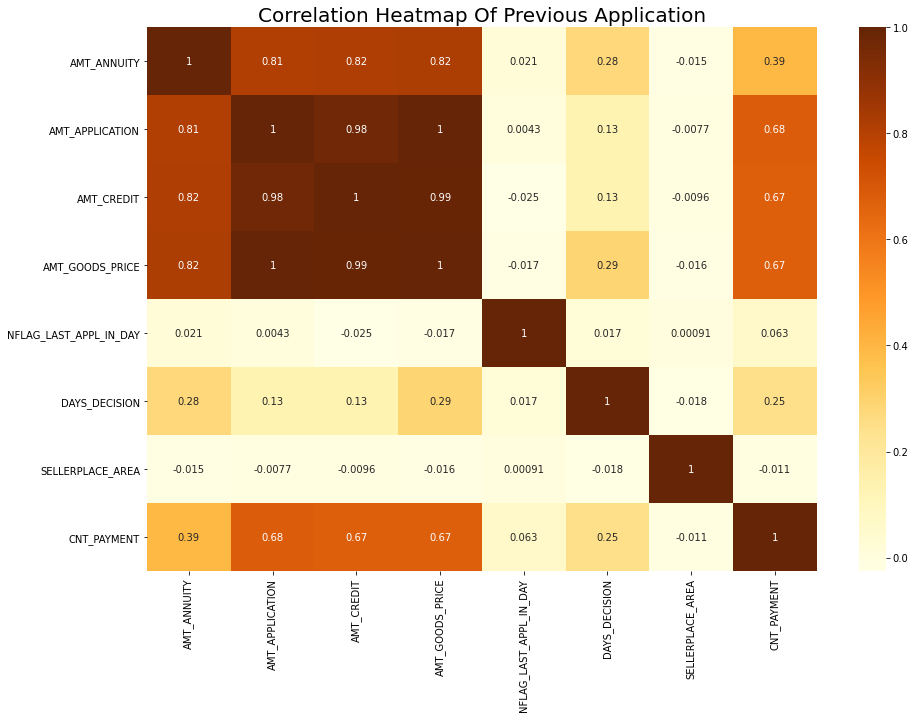

In [97]:
#HeatMap of Previous Applicant Data
pa_heatmap_data = [pa.AMT_ANNUITY,pa.AMT_APPLICATION,pa.AMT_CREDIT,pa.AMT_GOODS_PRICE,pa.NFLAG_LAST_APPL_IN_DAY,pa.DAYS_DECISION,pa.SELLERPLACE_AREA,pa.CNT_PAYMENT]
pa_heatmap_headers = [ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

pa_heatmap = pd.concat(pa_heatmap_data, axis=1, keys=pa_heatmap_headers)

corr = pa_heatmap.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="YlOrBr")
plt.title('Correlation Heatmap Of Previous Application', fontsize=20)
plt.show()

**Inference:**

1. Highest Correlations:
 * Credit amount and Application Amount: Suggests that most of the loans amounts sanctioned were as per application of the client.
 * Goods Price and Application Amount: Suggests that goods price has a possible correlation with loan amount applied.
 * Credit amount and Goods Price: Above two observations naturally suggest correlation between these two. Same is proven in the heatmap.


2. Lowest Correlations:
 * Last application in day flag and sellerplace area appear to have to no correlation with other columns.

In [98]:
# Checking housing-type value counts
ad.NAME_HOUSING_TYPE.value_counts()

House / apartment      271709
With parents            14774
Municipal apartment     11146
Rented apartment         4862
Office apartment         2603
Co-op apartment          1113
Name: NAME_HOUSING_TYPE, dtype: int64

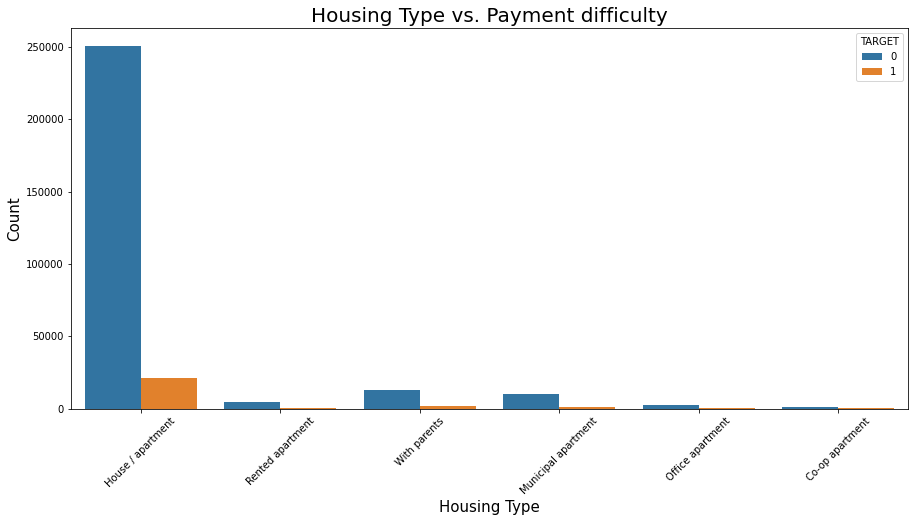

In [99]:
# Plot Housing Type vs. Payment difficulty

plt.figure(figsize=(15,7))
sns.countplot(ad['NAME_HOUSING_TYPE'],hue=ad['TARGET'])
plt.xticks(rotation=45)
plt.title("Housing Type vs. Payment difficulty",fontsize=20)
plt.xlabel('Housing Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [100]:
# Calculating value count percentage of different housing types for both targets
print('Housing Type percentage for target 0:\n',ad_target_0.NAME_HOUSING_TYPE.value_counts()* 100 / len(ad_target_0))
print('Housing Type percentage for target 1:\n',ad_target_1.NAME_HOUSING_TYPE.value_counts()* 100 / len(ad_target_1))

Housing Type percentage for target 0:
 House / apartment      89.001322
With parents            4.633827
Municipal apartment     3.621932
Rented apartment        1.514645
Office apartment        0.864446
Co-op apartment         0.363828
Name: NAME_HOUSING_TYPE, dtype: float64
Housing Type percentage for target 1:
 House / apartment      85.691779
With parents            6.996566
Municipal apartment     3.845688
Rented apartment        2.419713
Office apartment        0.686730
Co-op apartment         0.359523
Name: NAME_HOUSING_TYPE, dtype: float64


**Inference:**
* Most of the applicants live in house or apartment however those living with parents or living on rented house have more percentage of payment difficulty compared to those that don't, when you compare target 0 with target 1. 
* Therefore, along with House/apartment, we can consider these two housing types as our defaulter factors as well. 

# Merging application data with previous application data

In [101]:
print("Applicant data shape: ",ad.shape)
print("Previous applicant data shape: ",pa.shape)

Applicant data shape:  (306207, 46)
Previous applicant data shape:  (1669867, 23)


In [102]:
#Merging the two dataset using left join
merge_ad_pa = pd.merge(pa,ad, how='left', on = 'SK_ID_CURR')

In [103]:
#Shape of merged dataframe
merge_ad_pa.shape

(1669867, 68)

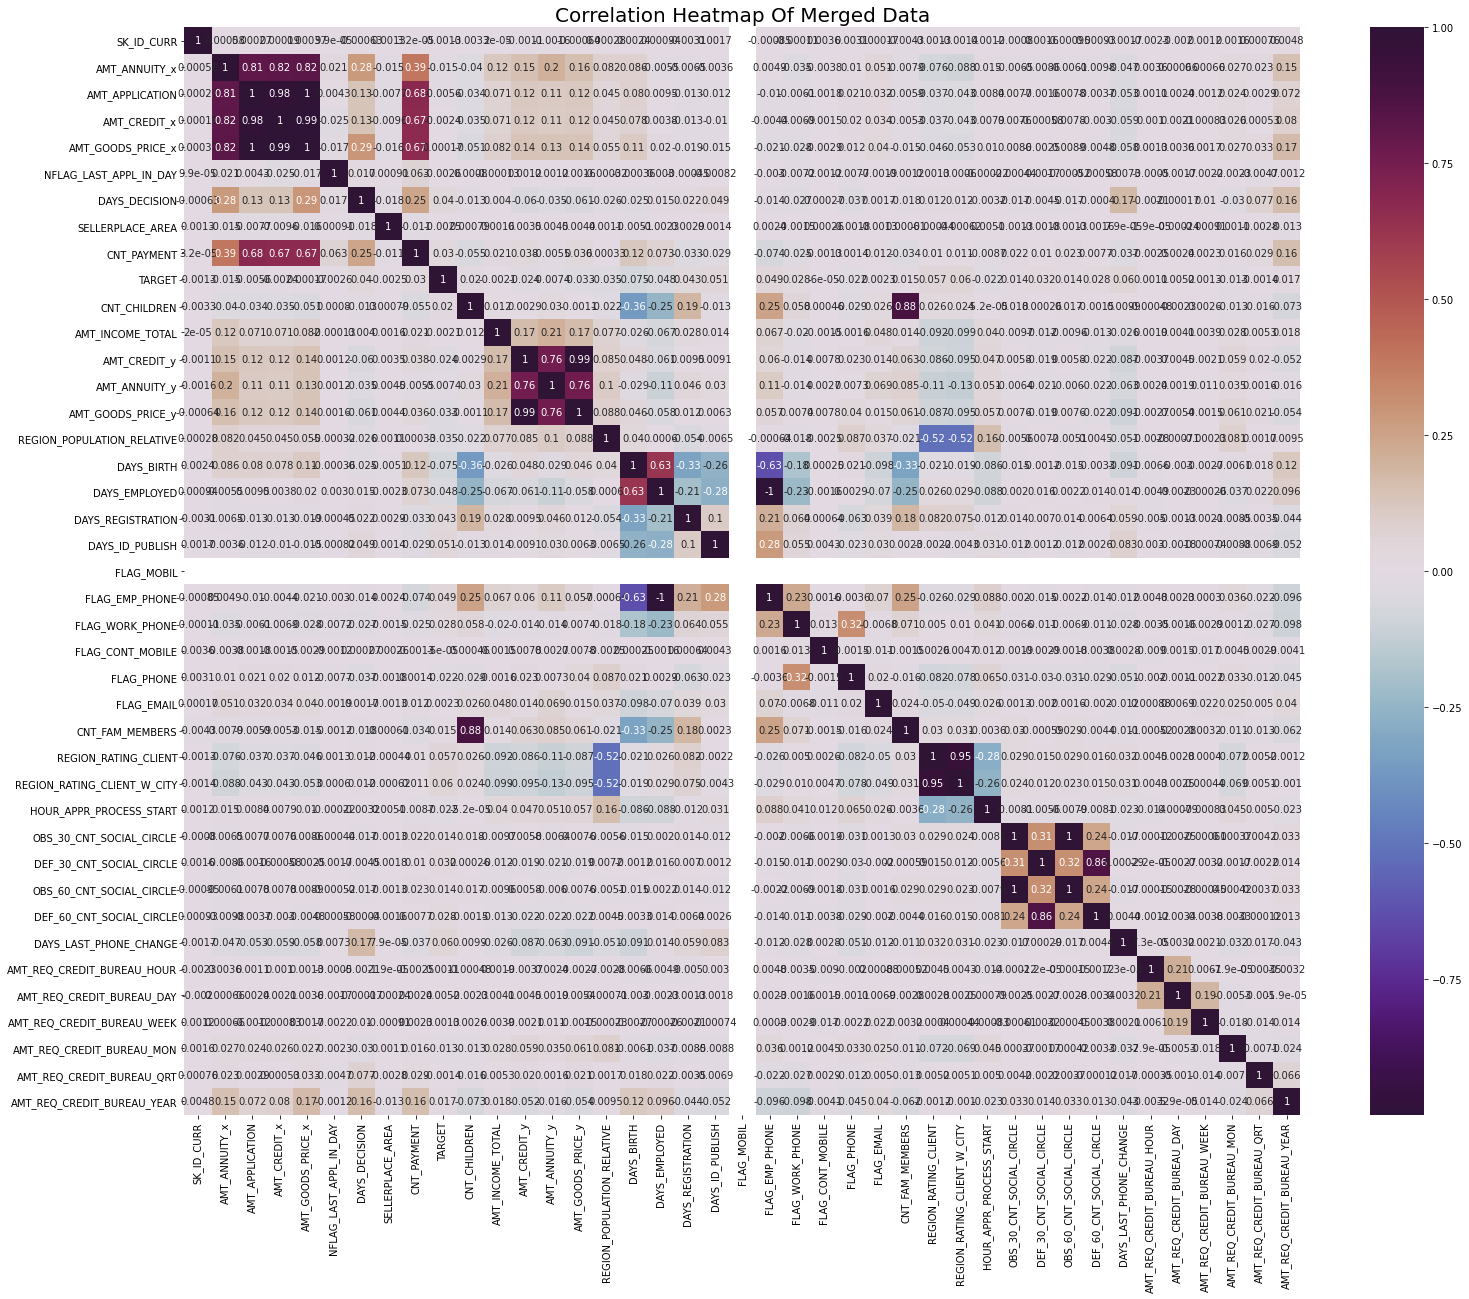

In [104]:
#Heatmap
corr = merge_ad_pa.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot = True, cmap="twilight_shifted")
plt.title('Correlation Heatmap Of Merged Data', fontsize=20)
plt.show()

* 'Number of Children' is highly correlated with 'Loan Annuity', 'Previous applicant credit amount' and 'Goods price', which means more applications are receive from applicants with higher number of kids. 
* Based on the diagram we found that the attributes below are highly correlated with Target attribute:
    * DAYS_DECISION - 0.04
    * DAYS_REGISTRATION - 0.043
    * DAYS_ID_RUBLISH - 0.051
    * FLAG_EMP_PHONE - 0.049
    * REGION_RATING_CLIENT- 0.057
    * REGION_RATING_CLIENT_W-CITY - 0.06
    * DAYS_LAST_PHONE_CHANGE - 0.06

### Lets breakdown the merged data for easier understanding and further examination of the relevant attributes

In [105]:
#Examining DAYS_DECISION
merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_DECISION.describe()

count    122014.000000
mean       -779.111569
std         729.849301
min       -2922.000000
25%       -1073.000000
50%        -491.000000
75%        -249.000000
max          -2.000000
Name: DAYS_DECISION, dtype: float64

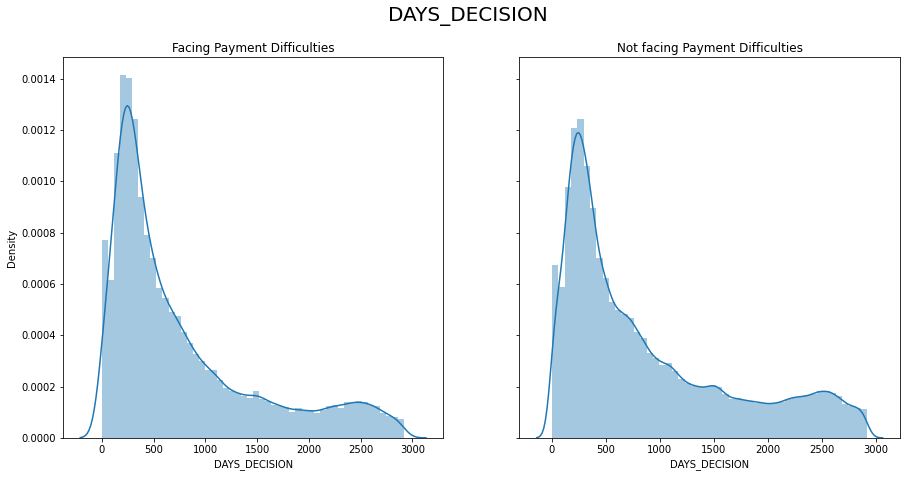

In [106]:
# Distribution plot of both targets against DAYS_DECISION

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_DECISION.abs(),ax=ax1).set(title='Facing Payment Difficulties')

sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 0].DAYS_DECISION.abs(),ax=ax2).set(title='Not facing Payment Difficulties')
plt.suptitle('DAYS_DECISION', fontsize=20)
plt.show()

**Inference:** 
Both categories, defaulter and non defaulter, are showing similar kind of structure so we can ignore this attribute.

In [107]:
#Examining DAYS_REGISTRATION

merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_REGISTRATION.describe()

count    122014.000000
mean      -4506.668841
std        3345.310317
min      -22928.000000
25%       -6705.000000
50%       -4057.000000
75%       -1623.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

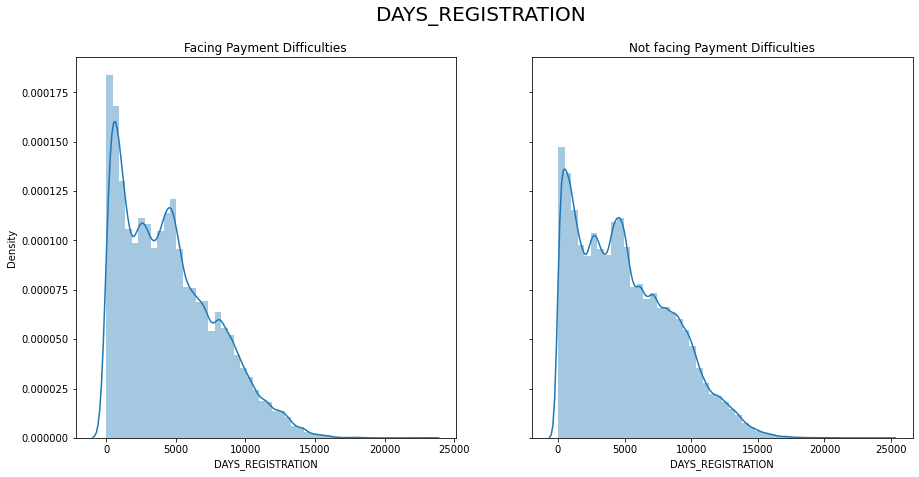

In [108]:
# Distribution plot of both targets against DAYS_REGISTRATION

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_REGISTRATION.abs(),ax=ax1).set(title='Facing Payment Difficulties')
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 0].DAYS_REGISTRATION.abs(),ax=ax2).set(title='Not facing Payment Difficulties')
plt.suptitle('DAYS_REGISTRATION', fontsize=20)
plt.show()

**Inference:** 
Both categories defaulter and non defaulter are showing similar kind of structure so we can ignore this attribute.

In [109]:
#Examining DAYS_ID_PUBLISH
merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_ID_PUBLISH.describe()
 

count    122014.000000
mean      -2785.363803
std        1515.707429
min       -6207.000000
25%       -4157.000000
50%       -2879.000000
75%       -1466.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

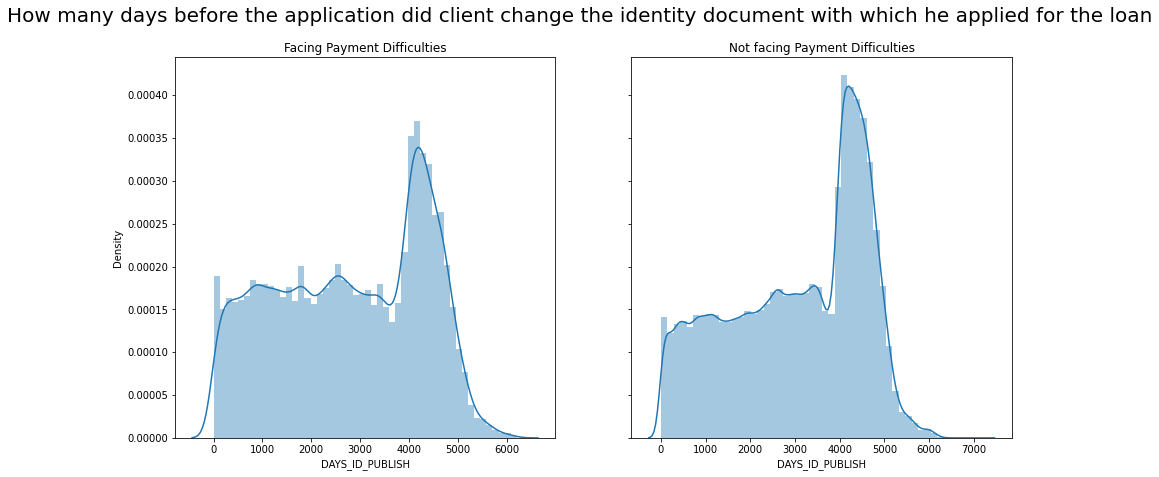

In [110]:
# Distribution plot of both targets against DAYS_ID_PUBLISH

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,7], sharey=True)
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_ID_PUBLISH.abs(),ax=ax1).set(title='Facing Payment Difficulties')
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 0].DAYS_ID_PUBLISH.abs(),ax=ax2).set(title='Not facing Payment Difficulties')
plt.suptitle('How many days before the application did client change the identity document with which he applied for the loan', fontsize=20)
plt.show()

**Inference:** 
Both categories defaulter and non defaulter are showing similar kind of structure so we can ignore this attribute.

In [111]:
#Examining FLAG_EMP_PHONE

merge_ad_pa[merge_ad_pa["TARGET"] == 1].FLAG_EMP_PHONE.describe()

count    122014.000000
mean          0.869056
std           0.337340
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64

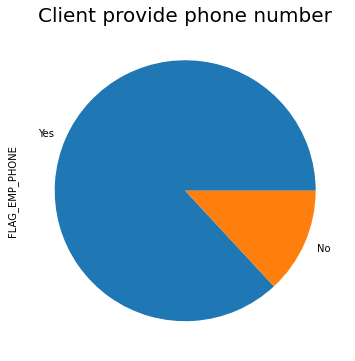

In [112]:
# Pie chart to check if defaulter clients provide phone number

plt.figure(figsize=[6,6])
explode = (0,0.2)
mylabels = ['Yes','No']
plt.title('Client provide phone number', fontsize=20)
merge_ad_pa[merge_ad_pa["TARGET"] == 1].FLAG_EMP_PHONE.value_counts().plot.pie(labels=mylabels)
plt.show()

**Inference:** 
Defaulter are also providing their contact details so we can not infer anything from this attribute.

In [113]:
# Examining REGION_RATING_CLIENT

merge_ad_pa[merge_ad_pa["TARGET"] == 1].REGION_RATING_CLIENT.describe()

count    122014.000000
mean          2.151589
std           0.496669
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

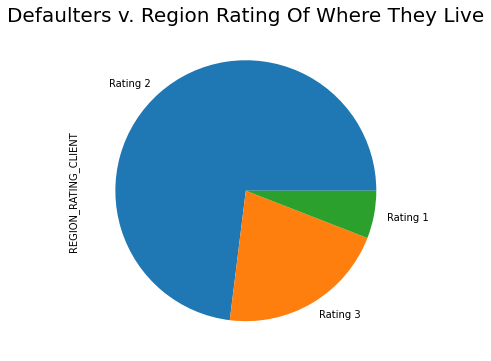

In [114]:
# Pie chart to check defaulter clients vs. region rating of their residency

plt.figure(figsize=[6,6])
mylabels=['Rating 2', 'Rating 3', 'Rating 1']
plt.title('Defaulters v. Region Rating Of Where They Live', fontsize=20)
merge_ad_pa[merge_ad_pa["TARGET"] == 1].REGION_RATING_CLIENT.value_counts().plot.pie(labels=mylabels)
plt.show()

**Inference:** 
The clients who live in 2 rated regions are more likely to have payment difficulty. 

In [115]:
#Examining REGION_RATING_CLIENT_W_CITY

merge_ad_pa[merge_ad_pa["TARGET"] == 1].REGION_RATING_CLIENT_W_CITY.describe()

count    122014.000000
mean          2.132575
std           0.490753
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

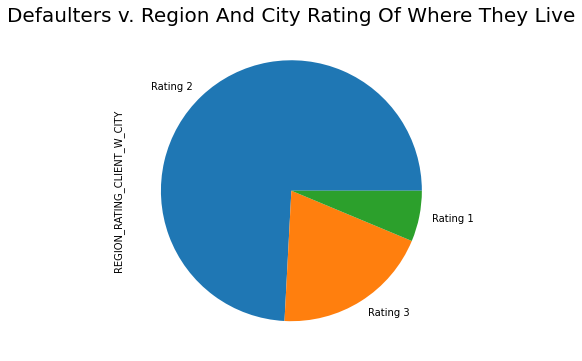

In [116]:
# Pie chart to check defaulter clients vs. region rating of their residency along with city

plt.figure(figsize=[6,6])
mylabels=['Rating 2', 'Rating 3', 'Rating 1']
plt.title('Defaulters v. Region And City Rating Of Where They Live', fontsize=20)
merge_ad_pa[merge_ad_pa["TARGET"] == 1].REGION_RATING_CLIENT_W_CITY.value_counts().plot.pie(labels=mylabels)
plt.show()

**Inference:** 
The clients who live in 2 rated cities and regions are more likely to have payment difficulty.

In [117]:
#Examining DAYS_LAST_PHONE_CHANGE

merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_LAST_PHONE_CHANGE.describe()

count    122014.000000
mean       -929.574246
std         751.471271
min       -3884.000000
25%       -1515.000000
50%        -755.000000
75%        -310.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

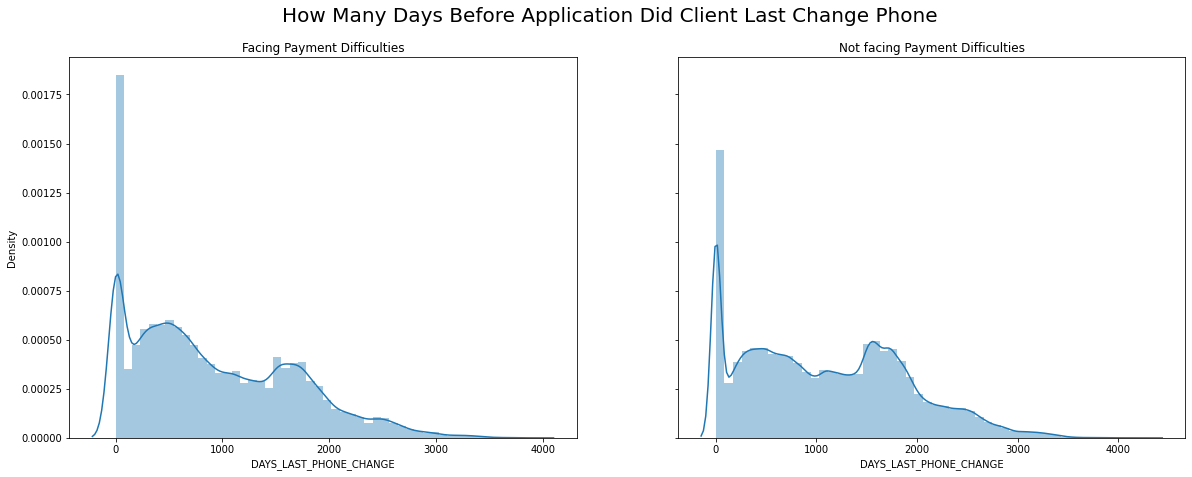

In [118]:
# Distribution plot of both targets against DAYS_LAST_PHONE_CHANGE

fig, (ax1,ax2) = plt.subplots(1,2, figsize=[20,7], sharey=True)
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 1].DAYS_LAST_PHONE_CHANGE.abs(),ax=ax1).set(title='Facing Payment Difficulties')
sns.distplot(merge_ad_pa[merge_ad_pa["TARGET"] == 0].DAYS_LAST_PHONE_CHANGE.abs(),ax=ax2).set(title='Not facing Payment Difficulties')
plt.suptitle('How Many Days Before Application Did Client Last Change Phone', fontsize=20)
plt.show()

**Inference:** 
The clients who last changed the phone within few days of applying are more likely to default. 

## Top 10 positive correlations for Defaulters

In [119]:
#Top 10 correlation
top10_merge = merge_ad_pa.corr().unstack().sort_values(ascending=False).drop_duplicates()

#Starting index from 1 because SK_ID_CURR was used to merge
top10_merge[1:11]

AMT_GOODS_PRICE_x            AMT_APPLICATION             0.999884
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE    0.998563
AMT_CREDIT_x                 AMT_GOODS_PRICE_x           0.993087
AMT_CREDIT_y                 AMT_GOODS_PRICE_y           0.986341
AMT_APPLICATION              AMT_CREDIT_x                0.975822
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.945503
CNT_FAM_MEMBERS              CNT_CHILDREN                0.879213
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.862736
AMT_GOODS_PRICE_x            AMT_ANNUITY_x               0.820895
AMT_CREDIT_x                 AMT_ANNUITY_x               0.816429
dtype: float64

In [120]:
# Assigning dataframe as per target 0 and target 1 variable 
target0_merge_ad_pa  = merge_ad_pa[merge_ad_pa["TARGET"] == 0]
target1_merge_ad_pa  = merge_ad_pa[merge_ad_pa["TARGET"] == 1]

In [121]:
#Top 10 correlation of applicants who did not face problems with payment
top10_merge_target0 = target0_merge_ad_pa.corr().unstack().sort_values(ascending=False).drop_duplicates()

#Starting index from 1 because SK_ID_CURR was used to merge
top10_merge_target0[1:11]

AMT_APPLICATION           AMT_GOODS_PRICE_x              0.999888
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE       0.998579
AMT_GOODS_PRICE_x         AMT_CREDIT_x                   0.993297
AMT_CREDIT_y              AMT_GOODS_PRICE_y              0.986625
AMT_APPLICATION           AMT_CREDIT_x                   0.975764
REGION_RATING_CLIENT      REGION_RATING_CLIENT_W_CITY    0.944260
CNT_CHILDREN              CNT_FAM_MEMBERS                0.878467
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE       0.863173
AMT_ANNUITY_x             AMT_GOODS_PRICE_x              0.821057
AMT_CREDIT_x              AMT_ANNUITY_x                  0.816580
dtype: float64

In [122]:
#Top 10 correlation of applicants who faced problems with payment
top10_merge_target1 = target1_merge_ad_pa.corr().unstack().sort_values(ascending=False).drop_duplicates()

#Starting index from 1 because SK_ID_CURR was used to merge
top10_merge_target1[1:11]

AMT_GOODS_PRICE_x            AMT_APPLICATION             0.999675
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    0.998391
AMT_CREDIT_x                 AMT_GOODS_PRICE_x           0.992292
AMT_GOODS_PRICE_y            AMT_CREDIT_y                0.982936
AMT_CREDIT_x                 AMT_APPLICATION             0.975686
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.956395
CNT_FAM_MEMBERS              CNT_CHILDREN                0.886265
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.858279
AMT_CREDIT_x                 AMT_ANNUITY_x               0.840375
AMT_ANNUITY_x                AMT_GOODS_PRICE_x           0.840052
dtype: float64

# Final Observations

### Important Columns For The Bank To Watchout Against Defaults:
* AMT_INCOME_TOTAL
    * We have noticed that the clients who have higher income are less likely to have payment difficulties, so the low income groups are more likely to be a defaulter. 
    * Also the most defaulters for both Male and Female come from the 100000 to 150000 income range.
        * There are more female defaulters in income range 250000 and below.
        * There are more male defaulters in income range 250000 and above.
* AMT_CREDIT
    *     For clients with payment difficulties, those with higher credit amount and very low region population have noticable correlation outliers, compared to clients in regions with higher population.
* NAME_FAMILY_STATUS
    *     Non-married clients with academic degrees have a much higher minimum whisker than all other categories.
    *     Married clients with higher education or secondary/secondary special education have significant outliers on the higher side.
* CNT_CHILDREN
    *     Clients that live in high population area and have large number of kids have higher chances of facing payment difficulty.
* NAME_EDUCATION_TYPE
    *     Most defaulters came from Secondary and Higher education background.
    *     Least defaulters came from Academic degree background
* OCCUPATION_TYPE
    *     Cooking staff had the least count of clients with difficulty in payment of loan.
    *     Labourers had the highest count of clients with difficulty in payment of loan.
* NAME_HOUSING_TYPE
    *     Most of the applicants live in house or apartment however those living with parents or living on rented house have more percentage of payment difficulty compared to those that don't, when you compare target 0 with target 1.
    *     Therefore, along with House/apartment, we can consider these two housing types as our defaulter factors as well.
    
* Apart from the above, following are few more attributes that can also help us to identify defaulters: 
    * DAYS_LAST_PHONE_CHANGE
        * Clients who change the phone within few days of applying are more likely to default.
    * REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY
        * Clients who live in 2 rated cities and regions are more likely to default.

### Important Columns For The Bank To Increase Revenue And Clients:
* DAYS_BIRTH
    * 55 to 60 age bracket has the highest non-default count in absolute numbers.
    * Their default rate isn't substantially high either compared to others, so they may be focused on for numbers growth.
* NAME_FAMILY_STATUS
    * More focus can be given on Widows and separated clients as they are observed to take good amount of loans with much much less default rate compared to married/single.
* NAME_EDUCATION_TYPE
    * Non-Married clients with higher education or secondary/secondary special education have significant outliers on the upperside to tap as less risky clients.
    * All people with academic degree also have high income overall.
* OCCUPATION_TYPE
    * Cooking staff and private service staff drive provide a very good volume as well as very low chance of payment issues.
* REGION_POPULATION_RELATIVE
    * Cities with medium to high region population have very low default rate for loan amounts. They can be focused on for bigger loans to increase revenue.


## ****END****

Hope this will help people in some way. Please don't forget to upvote if this notebook helped you. Thank you.